<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="Areo.jpg">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=24px>
                    <b>DYNAMIC PRICE PREDICTION OF AIRLINES
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Problem Statement
Airline companies are following the dynamic pricing model. They have fixed number of seats in their plane. They are following the dynamic pricing strategy for selling seats to increase the revenue. The pricing will change based on the demand. The demand is dependent on many factors such as holiday, peak time, short/long route, number of stops, economy class etc,. Airlines have to model the demand, so that they can sell all the seats with more profit. Modelling the demand is critical because poor modelling may leave more seat empty or lead to less revenue. <br>


## Objective

The objective of this project is to model the airline price change using the different features. This predictive model will help the passenger to make purchasing decisions by predicting how air ticket prices will evolve in the future.

## Data Definition

This dataset contains 10 following independent features to train a **predictor (Price)**.<br>
**Airline:** The name of the airline. Date: The date of the journey Departure <br>
**Station:** The source from which the service begins. <br>
**Arrival Station:** The destination where the service ends. <br>
**Route map:** The route taken by the flight to reach the destination. <br>
**Departure Time:** The time when the journey starts from the source.<br> 
**Arrival Time:** Time of arrival at the destination. <br>
**Journey Time:** Total duration of the flight. <br>
**Stops:** Total stops between the source and destination.<br>
**Extra_Info:** Additional information about the flight<br>

Additional dataset with Distance between desitinations **(Distance(Km))** is provided to improve prediction
                                        

## Table of Contents

1. **[Data Definition](#Data_def)** <br>
    1.1 **[Import Libraries](#import_lib)**<br>
    1.2 **[Read Data](#Read)** <br>
    1.3 **[Understand Variable](#Understand)** <br>
    1.4 **[Descriptive Analysis](#Descriptive)** <br>
2. **[Exploratory Data Analysis](#EDA)** <br>
    2.1 **[Univariate Analysis](#UnivariateAnalysis)**<br>
    2.2 **[Bivariate Analysis](#BivariateAnalysis)** <br>
3. **[Data Preprocessing](#Preprocess)** <br>
    3.1 **[Missing Values](#MissingValues)** <br>
    3.2 **[Handling Non-Numeric Data](#HandlingNon-NumericData)** <br>
    3.3 **[Normalization and Transformation](#NormalizationandTransformation)** <br>
    4.4 **[Outlier Treatment](#Outliers)**<br>
4. **[Feature Engineering](#Feature)** <br>
    4.1 **[Feature Transformation](#FeatureTransformation)** <br>
    4.2 **[Feature Scaling](#FeatureScaling)** <br>
    4.3 **[Feature Selection](#FeatureSelection)** <br>
5. **[Model Building](#Build)** <br>
    5.1 **[Assumptions of Linear Regression](#Assumptions)** <br>
    5.2 **[Train-Test Split](#Train-Test)** <br>
6. **[Model Validation and Tuning](#Tune)**<br>
    6.1 **[Model evaluation metrics](#Modelevaluationmetrics)** <br>
    6.2 **[Interaction Effect](#InteractionEffect)** <br>
7. **[Model Testing](#Test)** <br>
    7.1 **[Bias and Variance](#Bias)** <br>
    7.2 **[Overfitting and underfitting](#Overfitting)** <br>
    7.3 **[Regularization](#Regularization)** <br>
    7.4 **[Grid Search](#Grid)** <br>
8. **[Save Predictive Model](#Deploy)** <br>

<a id='Data_def'></a> 
## 1 Data Definition

<a id='import_lib'></a> 
### 1.1 Import Libraries

In [1]:
# supress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# 'Os' module provides functions for interacting with the operating system 
import os

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
%matplotlib inline

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# 'Scikit-learn' (sklearn) emphasizes various regression, classification and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

# 'Statsmodels' is used to build and analyze various statistical models
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.tools.eval_measures import rmse
from statsmodels.compat import lzip
from statsmodels.graphics.gofplots import ProbPlot

# 'SciPy' is used to perform scientific computations
from scipy.stats import f_oneway
from scipy.stats import jarque_bera
from scipy import stats

### Set Options

In [2]:
# the path for reading the data file
# Note: Set your path accordingly
#os.chdir('/Users/Dippies/GL DSE Deliveries/Regression/Nov 22')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# return an output value upto 6 decimals
pd.options.display.float_format = '{:.6f}'.format


<a id='Read'></a>
### 1.2 Read Data

In [3]:
# read data first dataset and store them in dataframe

df_fare = pd.read_excel('./airfare.xlsx')
df_fare.head()

,Airline,Date,Departure Station,Arrival Station,Route Map,Departure Time,Arrival Time,Journey Time,Stops,Extra Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
# read second data file

df_distance = pd.read_csv('./air_distance.csv')

df_distance.head()

,Unnamed: 0,Source,Dest,Distance(Km)
0,0,BLR,DEL,1709.710000
1,1,CCU,IXR,327.840000
2,2,IXR,BBI,344.540000
3,3,BBI,BLR,1166.170000
4,4,DEL,LKO,423.410000


### Combine both dataset to make reduce number of EDA steps

In [5]:
# remove spaces in columns name
df_fare.columns = df_fare.columns.str.replace(' ','_')
df_fare.head(2)

,Airline,Date,Departure_Station,Arrival_Station,Route_Map,Departure_Time,Arrival_Time,Journey_Time,Stops,Extra_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [6]:
# create Source and Destination codes using Route Map start and End digits
df_fare['Source']=df_fare['Route_Map'].str[:3]
df_fare['Dest']=df_fare['Route_Map'].str[-3:]

In [7]:
# merge both dataset to one
df_combined = pd.merge(df_fare, df_distance, on=['Source', 'Dest'],how='left')

In [8]:
# remove unwanted columns as departure and arrival airport details have been captured
df_combined.drop(['Departure_Station','Arrival_Station','Unnamed: 0'],axis =1,inplace=True)

In [9]:
df_combined.head()

,Airline,Date,Route_Map,Departure_Time,Arrival_Time,Journey_Time,Stops,Extra_Info,Price,Source,Dest,Distance(Km)
0,IndiGo,24/03/2019,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,BLR,DEL,1709.710000
1,Air India,1/05/2019,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,CCU,BLR,1547.270000
2,Jet Airways,9/06/2019,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,DEL,COK,NaN
3,IndiGo,12/05/2019,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,CCU,BLR,1547.270000
4,IndiGo,01/03/2019,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,BLR,DEL,1709.710000


### Understand the Dataset

To know the dimensions of the data:

In [10]:
# .shape returns the dimension of the data
df_combined.shape

(9000, 12)

We see the dataframe has 12 columns and 9000 observations in the combined dataset .<br>
Note : we have replaced Departure_Station , Arrival_Station with city code and concatnated Distance between cities into one combined file	

### Data Types

<a id='Understand'></a>
### 1.3 Understand Variable

In [11]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9000 entries, 0 to 8999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Airline         9000 non-null   object 
 1   Date            9000 non-null   object 
 2   Route_Map       9000 non-null   object 
 3   Departure_Time  9000 non-null   object 
 4   Arrival_Time    9000 non-null   object 
 5   Journey_Time    9000 non-null   object 
 6   Stops           9000 non-null   object 
 7   Extra_Info      9000 non-null   object 
 8   Price           9000 non-null   int64  
 9   Source          9000 non-null   object 
 10  Dest            9000 non-null   object 
 11  Distance(Km)    5168 non-null   float64
dtypes: float64(1), int64(1), object(10)
memory usage: 914.1+ KB


**Observation:** Date ,Departure_Time ,Arrival_Time are shown as objects while they are DateTime fields <br>
    Distance(Km) has some null values

**Change the incorrect data types**

In [12]:
df_combined['Date'] =pd.to_datetime(df_fare.Date, format="%d/%m/%Y")

In [13]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
df_combined["Dep_hour"] = pd.to_datetime(df_combined["Departure_Time"]).dt.hour

# Extracting Minutes
df_combined["Dep_min"] = pd.to_datetime(df_combined["Departure_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
df_combined.drop(["Departure_Time"], axis = 1, inplace = True)



In [14]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
df_combined["Arrival_hour"] = pd.to_datetime(df_combined.Arrival_Time).dt.hour

# Extracting Minutes
df_combined["Arrival_min"] = pd.to_datetime(df_combined.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
df_combined.drop(["Arrival_Time"], axis = 1, inplace = True)



**Recheck the data types after the conversion**

In [15]:
df_combined.dtypes

Airline                 object
Date            datetime64[ns]
Route_Map               object
Journey_Time            object
Stops                   object
Extra_Info              object
Price                    int64
Source                  object
Dest                    object
Distance(Km)           float64
Dep_hour                 int64
Dep_min                  int64
Arrival_hour             int64
Arrival_min              int64
dtype: object

<a id='Descriptive'></a> 
### 1.4 Descriptive Analysis

**For numerical variables, we use .describe()**

In [16]:
# 5 point summary of numerical variables
df_combined.describe(datetime_is_numeric=True).round().T

,count,mean,min,25%,50%,75%,max,std
Date,9000,2019-05-04 15:01:07.200000256,2019-03-01 00:00:00,2019-03-27 00:00:00,2019-05-15 00:00:00,2019-06-06 00:00:00,2019-06-27 00:00:00,NaN
Price,9000.000000,9088.000000,1759.000000,5228.000000,8369.000000,12373.000000,79512.000000,4605.000000
Distance(Km),5168.000000,1492.000000,624.000000,1547.000000,1547.000000,1710.000000,1710.000000,323.000000
Dep_hour,9000.000000,12.000000,0.000000,8.000000,11.000000,18.000000,23.000000,6.000000
Dep_min,9000.000000,24.000000,0.000000,5.000000,25.000000,40.000000,55.000000,19.000000
Arrival_hour,9000.000000,13.000000,0.000000,8.000000,14.000000,19.000000,23.000000,7.000000
Arrival_min,9000.000000,25.000000,0.000000,10.000000,25.000000,35.000000,55.000000,17.000000


**Inference:** Data is from 1st March 2019 to 27th June 2019 during this period Price of ticket which is the depedent  varies from 1759 to 9088 <br>
If we observe the count of all the variables, there is less count for variable Distance(Km) than other variables. So we can say that there are missing values in these variables.

**For categorical features, we use .describe(include=object)**

In [17]:
# Descriptive analysis of Categorical variables
df_combined.describe(include ='object').T

,count,unique,top,freq
Airline,9000,12,Jet Airways,3227
Route_Map,9000,124,DEL → BOM → COK,2024
Journey_Time,9000,362,2h 50m,471
Stops,9000,4,1 stop,4753
Extra_Info,9000,9,No info,7053
Source,9000,5,DEL,3832
Dest,9000,5,COK,3832


**Observations:** There are 12 airlines with Jet Airway having the highest count <br>
 Journey_Time is the time taken for travel and it has 362 unique values , hence it will have to be convereted to time in hours or minutes during Feature Engineering 

<a id='MissingValues'></a>
### 3.1 Missing Values

In [18]:
df_combined.isnull().sum()

Airline            0
Date               0
Route_Map          0
Journey_Time       0
Stops              0
Extra_Info         0
Price              0
Source             0
Dest               0
Distance(Km)    3832
Dep_hour           0
Dep_min            0
Arrival_hour       0
Arrival_min        0
dtype: int64

**Visualize Missing Values using Heatmap**

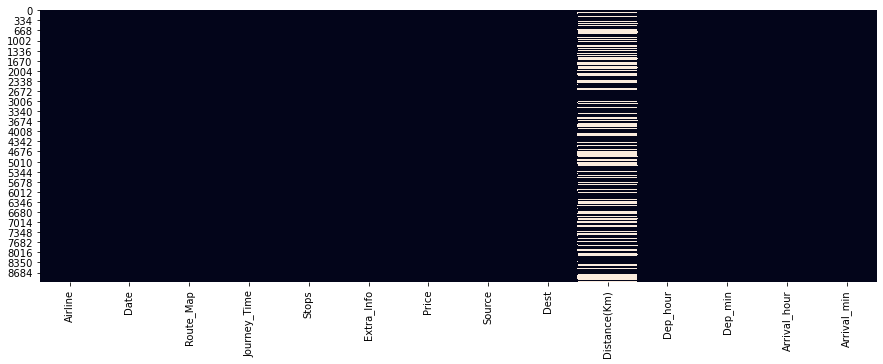

In [19]:
# set the figure size
plt.rcParams["figure.figsize"]=[15,5]

# plot a heatmap of the missing values in the data
# cbar: specify whether to display the color index or not
sns.heatmap(df_combined.isnull(), cbar = False)

# display the plot
plt.show()

**Observation:** only Distance(Km) has missing values

In [20]:
df_combined.groupby(['Source','Dest'])['Distance(Km)'].describe(include='all')

,,count,mean,std,min,25%,50%,75%,max
Source,Dest,,,,,,,,
BLR,DEL,1851.000000,1709.710000,0.000000,1709.710000,1709.710000,1709.710000,1709.710000,1709.710000
BOM,HYD,582.000000,623.540000,0.000000,623.540000,623.540000,623.540000,623.540000,623.540000
CCU,BLR,2415.000000,1547.270000,0.000000,1547.270000,1547.270000,1547.270000,1547.270000,1547.270000
DEL,COK,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MAA,CCU,320.000000,1387.260000,0.000000,1387.260000,1387.260000,1387.260000,1387.260000,1387.260000


**Observation:** only DEL ( Delhi) to COK ( Cochin) destination is having null values

**Deal with Missing Values**

In [21]:
# Calcuate distance from Delhi to Cochin

# Calcuate distance from Delhi to Bangalore
Dist_DEL_BOM = df_distance.loc[(df_distance['Source']== 'BOM')& (df_distance['Dest'] =='DEL')]['Distance(Km)']

# Calcuate distance from Bangalore to Cochin
Dist_BOM_COK = df_distance.loc[(df_distance['Source']== 'BOM')& (df_distance['Dest'] =='COK')]['Distance(Km)']

# Add both above distance to get distance from Delhi to Cochin
Dist_DEL_COK = int(Dist_DEL_BOM) + int(Dist_BOM_COK)
print( "Distance from Delhi to Cochin = %d km"%Dist_DEL_COK)

Distance from Delhi to Cochin = 2201 km


In [22]:
# replace null values in distance column with 2076 km
df_combined['Distance(Km)'].replace(np.NaN,Dist_DEL_COK,inplace = True)

In [23]:
df_combined.isnull().sum()

Airline         0
Date            0
Route_Map       0
Journey_Time    0
Stops           0
Extra_Info      0
Price           0
Source          0
Dest            0
Distance(Km)    0
Dep_hour        0
Dep_min         0
Arrival_hour    0
Arrival_min     0
dtype: int64

<a id='correlation'></a>
### 4.1.5 Correlation

<a id='EDA'></a> 
## 2 Exploratory Data Analysis

**1. Filter out only the numeric variables from the dataframe using select_dtypes() function**

In [24]:
# select the numerical features in the dataset using 'select_dtypes()'
# select_dtypes(include=np.number): considers the numeric variables
df_numeric_features = df_combined.select_dtypes(include=np.number)

# print the names of the numeric variables 
df_numeric_features.columns

Index(['Price', 'Distance(Km)', 'Dep_hour', 'Dep_min', 'Arrival_hour',
       'Arrival_min'],
      dtype='object')

In [25]:
df_numeric_features.skew()

Price           1.802715
Distance(Km)   -1.040570
Dep_hour        0.121284
Dep_min         0.177208
Arrival_hour   -0.367662
Arrival_min     0.108081
dtype: float64

In [26]:
df_numeric_features.dtypes

Price             int64
Distance(Km)    float64
Dep_hour          int64
Dep_min           int64
Arrival_hour      int64
Arrival_min       int64
dtype: object

In [27]:
def hist_plot(x,fig):
    plt.subplot(5,2,fig)
    sns.distplot(df_numeric_features[x])
  
                                   

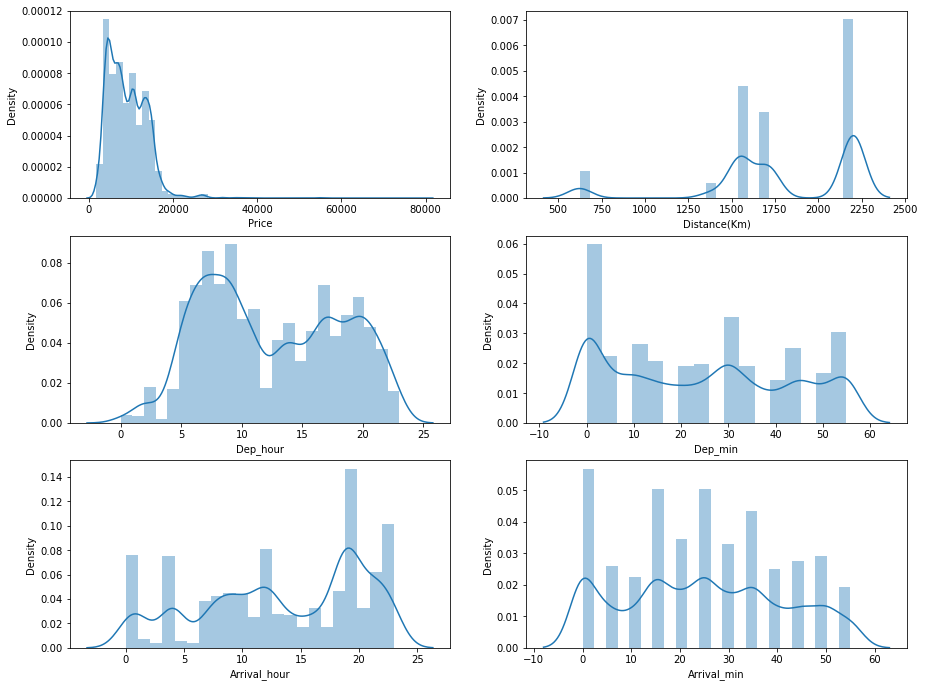

In [28]:
plt.figure(figsize=(15,20))
hist_plot('Price',1)
hist_plot('Distance(Km)',2)
hist_plot('Dep_hour',3)
hist_plot('Dep_min',4)
hist_plot('Arrival_hour',5)
hist_plot('Arrival_min',6)

**2.  Call the corr() function which will return the correlation matrix of numeric variables**

In [29]:
# generate the correlation matrix
corr =  df_numeric_features.corr()

# print the correlation matrix
corr

,Price,Distance(Km),Dep_hour,Dep_min,Arrival_hour,Arrival_min
Price,1.000000,0.319573,0.007741,-0.023000,0.024206,-0.078801
Distance(Km),0.319573,1.000000,-0.081558,-0.074931,0.009381,-0.179639
Dep_hour,0.007741,-0.081558,1.000000,-0.022485,-0.000728,0.064345
Dep_min,-0.023000,-0.074931,-0.022485,1.000000,0.037843,-0.021631
Arrival_hour,0.024206,0.009381,-0.000728,0.037843,1.000000,-0.156793
Arrival_min,-0.078801,-0.179639,0.064345,-0.021631,-0.156793,1.000000


**3. Pass the correlation matrix to the heatmap() function of the seaborn library to plot the heatmap of the correlation matrix**

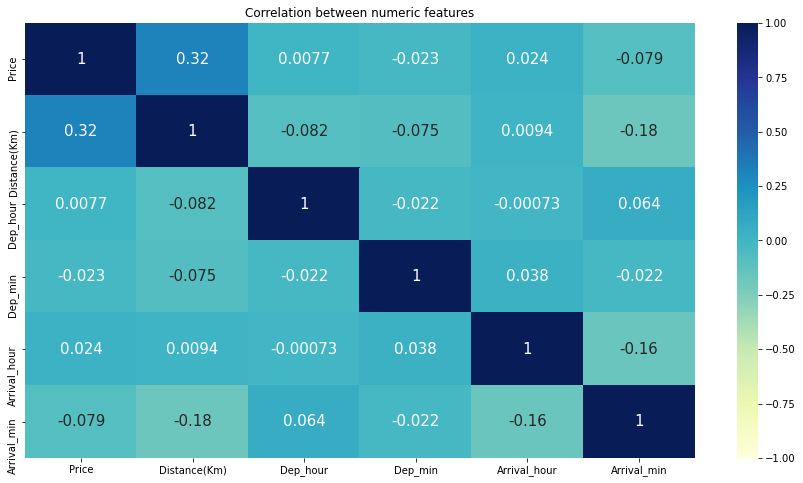

In [30]:
# set the figure size
plt.figure(figsize=(15, 8))

# plot the heat map
# corr: give the correlation matrix
# cmap: colour code used for plotting
# vmax: gives maximum range of values for the chart
# vmin: gives minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws: Sets the font size of the annotation
sns.heatmap(corr, cmap='YlGnBu', vmax=1.0, vmin=-1.0, annot = True, annot_kws={"size": 15}, )

# specify name of the plot using plt.title()
plt.title('Correlation between numeric features')

# display the plot
plt.show()

**Interpretation:** It can be observe that the numeric variables are not correlated with each other since all the correlation coefficients are close to zero. It implies that there is no multicollinearity in the data.

<a id='categorical'></a>
### 4.1.6 Analyze Categorical Variables

First let us print the summary statistics of the categorical features.

In [31]:
# display the summary statistics of categorical variables
# include=objec: selects the categoric features
df_combined.describe(include=object)

,Airline,Route_Map,Journey_Time,Stops,Extra_Info,Source,Dest
count,9000,9000,9000,9000,9000,9000,9000
unique,12,124,362,4,9,5,5
top,Jet Airways,DEL → BOM → COK,2h 50m,1 stop,No info,DEL,COK
freq,3227,2024,471,4753,7053,3832,3832


There are 7 categorical variables. From the output we see that the variable Journey_Time has most number of categories. <br>
There are 362 different Journey_Times in the data, this needed to be further segmented during feature engineering ,hence ignore during visualizing other catageorical variables

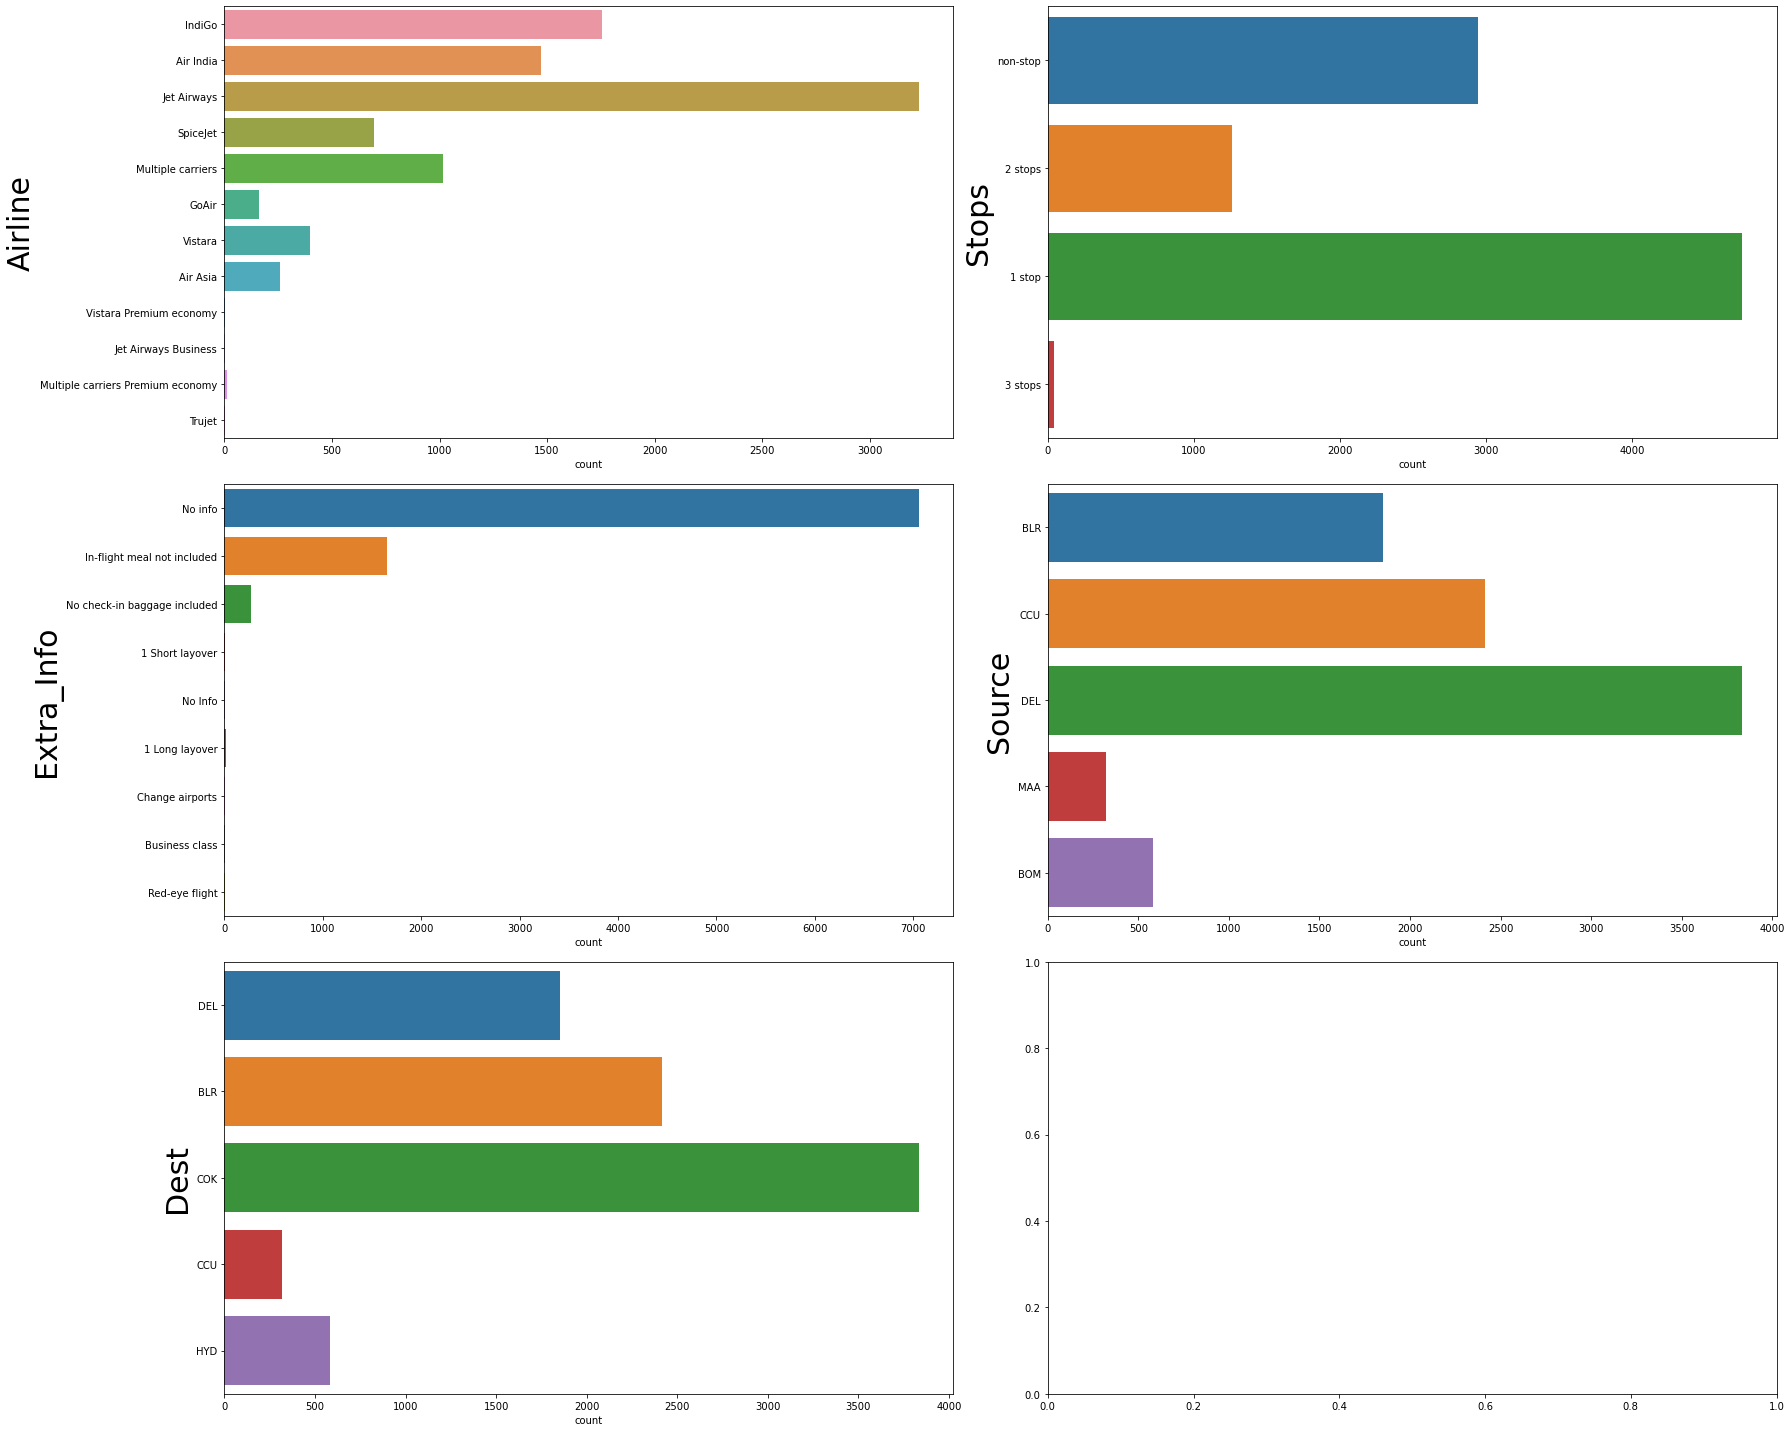

In [32]:
# create a list of all categorical variables
# include=object: selects the categoric features
# drop(['city'],axis=1): drops the city column from the dataframe
df_categoric_features = df_combined.select_dtypes(include='object').drop(['Journey_Time','Route_Map'], axis=1)

# plot the count distribution for each categorical variable 
# 'figsize' sets the figure size
fig, ax = plt.subplots(3, 2, figsize=(25, 20))

# plot a count plot for all the categorical variables
for variable, subplot in zip(df_categoric_features, ax.flatten()):
    
    # plot the count plot using countplot()
    # y: data on y axis
    # ax: specifies the axes object to draw the plot onto
    countplot = sns.countplot(y=df_combined[variable], ax=subplot )
       
    # set the y-axis labels 
    # fontsize = 30: sets the font size to 30
    countplot.set_ylabel(variable, fontsize = 30)
    
# avoid overlapping of the plots using tight_layout()    
plt.tight_layout()   

# display the plot
plt.show()

**Interpreration** from data <br>
Jet_Airways is the most booked airline <br>
1 stops tickets are most common  <br>
Extra info has many no ifno updated , need to check this column during Feature engineering <br>
highest number of fligts are starting at delhi and landing in Cochin <br>


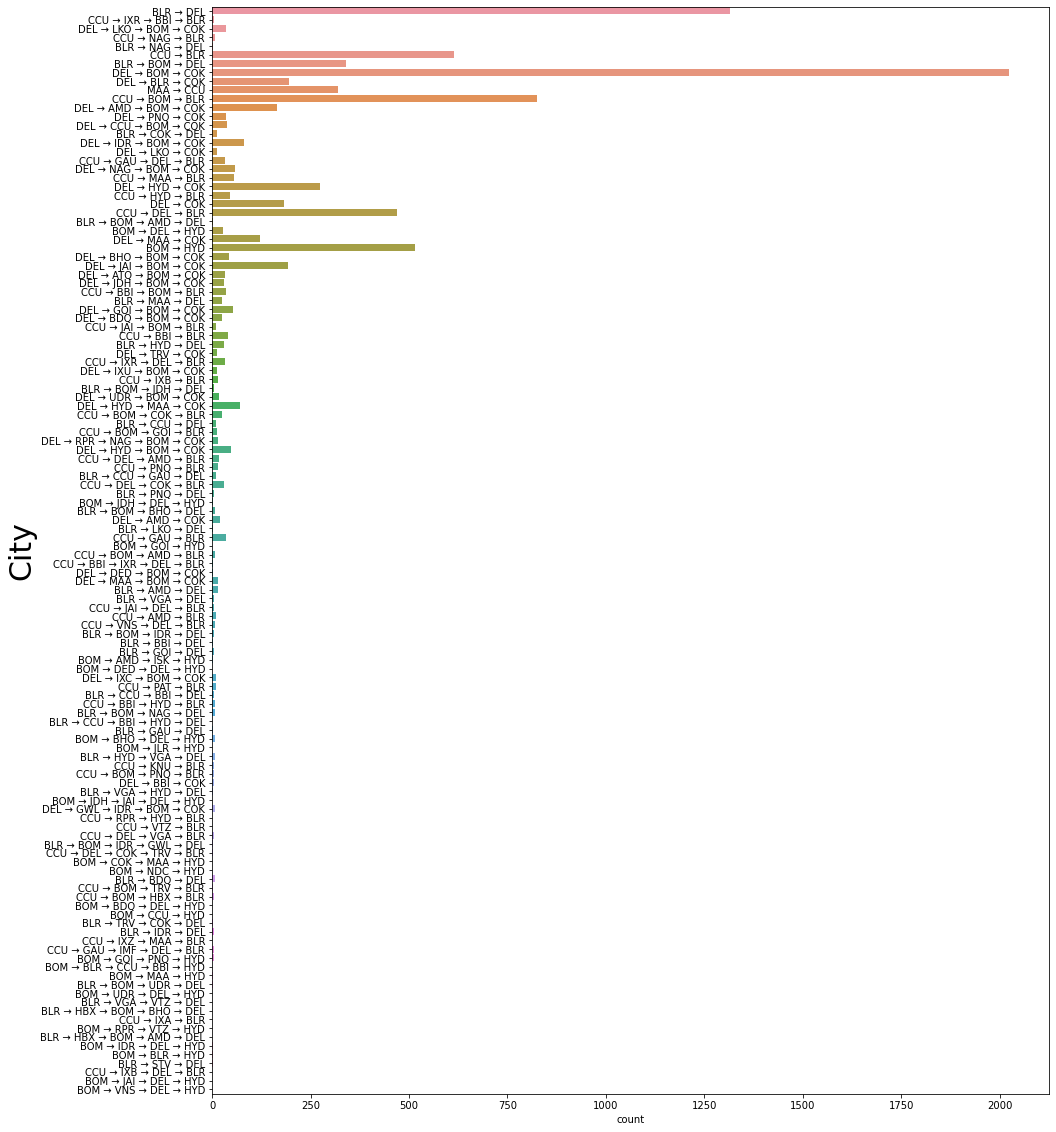

In [33]:
# set the figure size
plt.figure(figsize=(15, 20))

# plot the count plot using countplot()
# y: specifies the data to be plotted on y-axis
# orient: specifies the orientation of the barplot. "h" is used for horizontal orientation
# by default the orientation is vertical; but can be specifies by "v"
countplot = sns.countplot(y=df_combined['Route_Map'], orient="h")

# set the x-axis labels 
# fontsize = 30: sets the font size to 30
countplot.set_ylabel('City', fontsize = 30)

# display the plot
plt.show()

### Analyze Relationship Between Target and Categorical Variables¶

The box-and-whisker plot is commonly used for visualizing relationships between numerical variables and categorical variables.

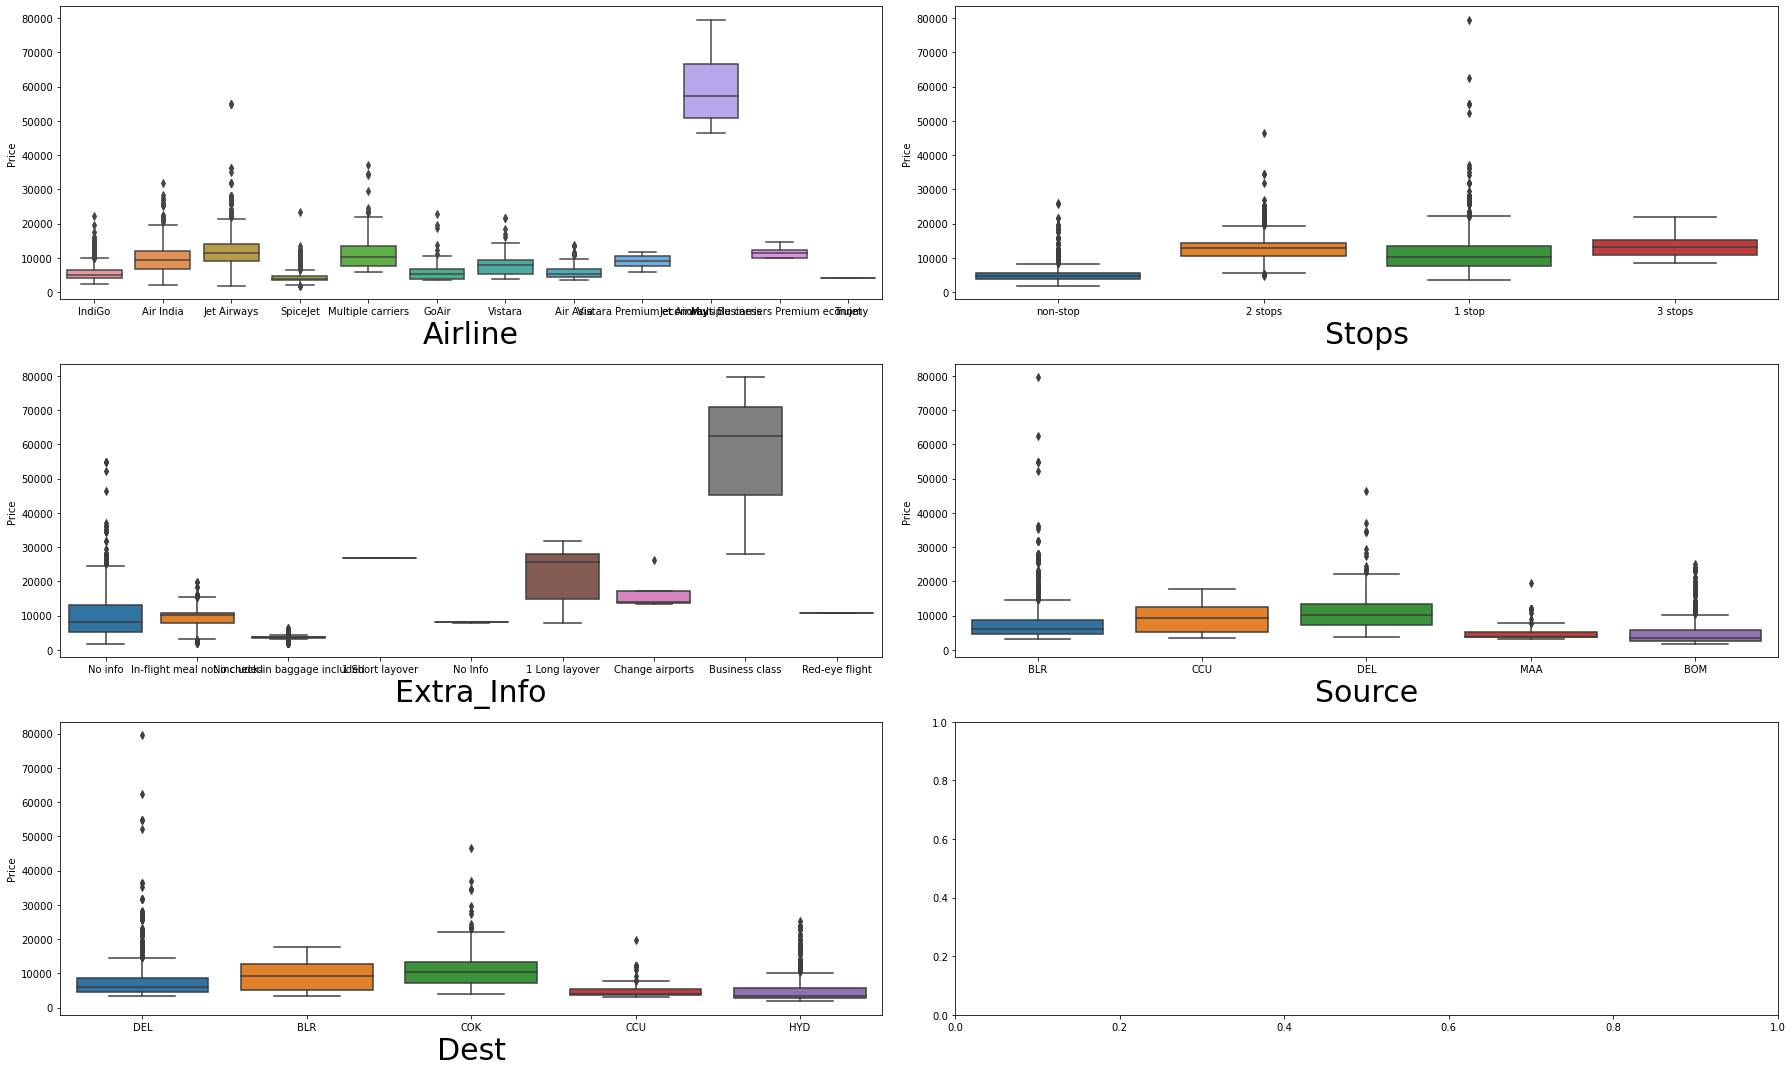

In [34]:
# plot the boxplot for each categorical variable 
# create subplots using subplots()
# 6 subplots in 3 rows and 2 columns
# 'figsize' sets the figure size
fig, ax = plt.subplots(3, 2, figsize=(25, 15))

# plot a boxplot for all the categorical variables 
for variable, subplot in zip(df_categoric_features, ax.flatten()):
    
    # x: variable on x-axis
    # y: variable in y-axis
    # data: dataframe to be used
    # ax: specifies the axes object to draw the plot onto
    boxplt = sns.boxplot(x=variable, y='Price', data=df_combined, ax=subplot)
    
    # set the x-axis labels 
    # fontsize = 30: sets the font size to 30
    boxplt.set_xlabel(variable, fontsize = 30)

# avoid overlapping of the plots using tight_layout()    
plt.tight_layout()   

# display the plot
plt.show() 

**Interpretation :** Airline ,number of stops and Business class have large variance on Price

<a id='Preprocess'></a> 
## 3 Data Preprocessing

In [35]:
# create a dataframe to use for regression
# move all numerical data to this dataframe as the null values have been treated

df_lr = df_combined.select_dtypes(include=np.number)
df_lr.head()

,Price,Distance(Km),Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3897,1709.710000,22,20,1,10
1,7662,1547.270000,5,50,13,15
2,13882,2201.000000,9,25,4,25
3,6218,1547.270000,18,5,23,30
4,13302,1709.710000,16,50,21,35


<a id='HandlingNon-NumericData'></a>
### 3.2 Handling Non-Numeric Data

In [36]:
cat_data =df_combined.select_dtypes(exclude=np.number)
cat_data.head()

,Airline,Date,Route_Map,Journey_Time,Stops,Extra_Info,Source,Dest
0,IndiGo,2019-03-24,BLR → DEL,2h 50m,non-stop,No info,BLR,DEL
1,Air India,2019-05-01,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,CCU,BLR
2,Jet Airways,2019-06-09,DEL → LKO → BOM → COK,19h,2 stops,No info,DEL,COK
3,IndiGo,2019-05-12,CCU → NAG → BLR,5h 25m,1 stop,No info,CCU,BLR
4,IndiGo,2019-03-01,BLR → NAG → DEL,4h 45m,1 stop,No info,BLR,DEL


**Observation:** we can see that Date and Journey_Time even though recorded as categorical need to convert this datatype into timestamp so as to use this column properly for prediction

In [37]:
# extract day of travel
df_lr["Journey_day"] = pd.to_datetime(cat_data.Date, format="%d/%m/%Y").dt.day

In [38]:
# extract month of travel
df_lr["Journey_month"] = pd.to_datetime(cat_data.Date, format="%d/%m/%Y").dt.month

In [39]:
# extract the travel duration in minutes from Journey_Time
duration = list(df_fare['Journey_Time'])
for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
Travel_Time =[]
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration
    Travel_Time.append(int(duration_hours[i] *60 +duration_mins[i]))

In [40]:
df_lr['Travel_Time'] = Travel_Time

In [41]:
df_lr.head()

,Price,Distance(Km),Dep_hour,Dep_min,Arrival_hour,Arrival_min,Journey_day,Journey_month,Travel_Time
0,3897,1709.710000,22,20,1,10,24,3,170
1,7662,1547.270000,5,50,13,15,1,5,445
2,13882,2201.000000,9,25,4,25,9,6,1140
3,6218,1547.270000,18,5,23,30,12,5,325
4,13302,1709.710000,16,50,21,35,1,3,285


## Handling Categorical Data

One can find many ways to handle categorical data. Some of them categorical data are,
1. <span style="color: blue;">**Nominal data**</span> --> data are not in any order --> <span style="color: green;">**OneHotEncoder**</span> is used in this case
2. <span style="color: blue;">**Ordinal data**</span> --> data are in order --> <span style="color: green;">**LabelEncoder**</span> is used in this case

In [42]:
cat_data["Airline"].value_counts()

Jet Airways                          3227
IndiGo                               1757
Air India                            1471
Multiple carriers                    1014
SpiceJet                              697
Vistara                               399
Air Asia                              256
GoAir                                 160
Multiple carriers Premium economy      11
Jet Airways Business                    4
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

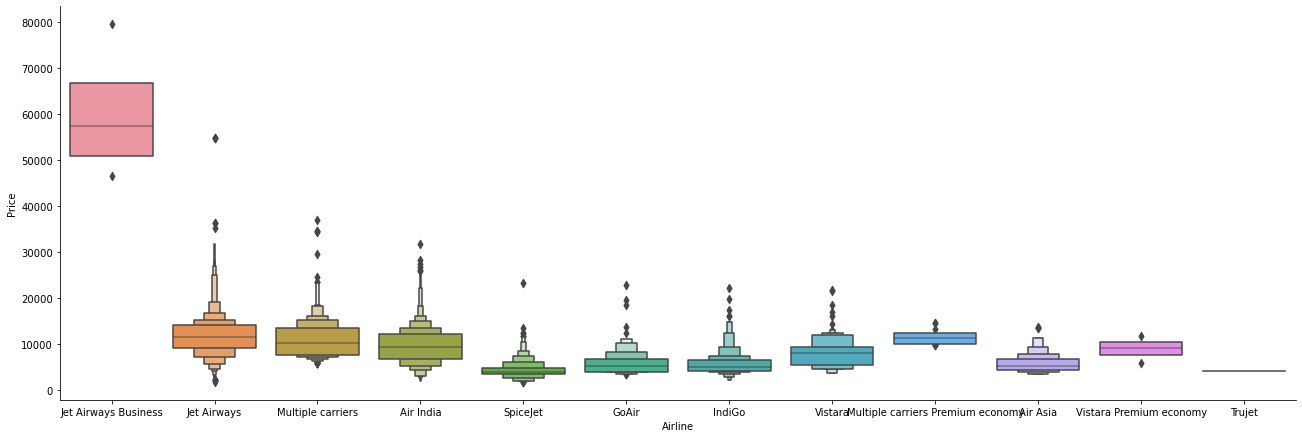

In [43]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = df_combined.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [44]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = cat_data[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

df_lr = pd.concat([df_lr,Airline],axis =1)
df_lr.head()

,Price,Distance(Km),Dep_hour,Dep_min,Arrival_hour,Arrival_min,Journey_day,Journey_month,Travel_Time,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,3897,1709.710000,22,20,1,10,24,3,170,0,0,1,0,0,0,0,0,0,0,0
1,7662,1547.270000,5,50,13,15,1,5,445,1,0,0,0,0,0,0,0,0,0,0
2,13882,2201.000000,9,25,4,25,9,6,1140,0,0,0,1,0,0,0,0,0,0,0
3,6218,1547.270000,18,5,23,30,12,5,325,0,0,1,0,0,0,0,0,0,0,0
4,13302,1709.710000,16,50,21,35,1,3,285,0,0,1,0,0,0,0,0,0,0,0


In [45]:
cat_data["Source"].value_counts()

DEL    3832
CCU    2415
BLR    1851
BOM     582
MAA     320
Name: Source, dtype: int64

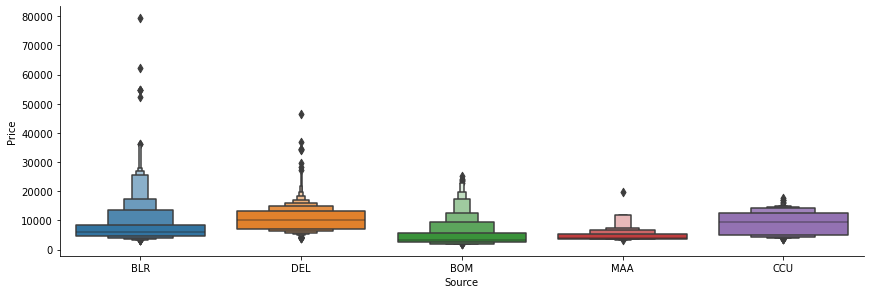

In [46]:
# Source vs Price

sns.catplot(y = "Price", x = "Source", data = df_combined.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [47]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = cat_data[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

df_lr = pd.concat([df_lr,Source],axis =1)
df_lr.head()

,Price,Distance(Km),Dep_hour,Dep_min,Arrival_hour,Arrival_min,Journey_day,Journey_month,Travel_Time,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_BOM,Source_CCU,Source_DEL,Source_MAA
0,3897,1709.710000,22,20,1,10,24,3,170,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,7662,1547.270000,5,50,13,15,1,5,445,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,13882,2201.000000,9,25,4,25,9,6,1140,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,6218,1547.270000,18,5,23,30,12,5,325,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,13302,1709.710000,16,50,21,35,1,3,285,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [48]:
cat_data["Dest"].value_counts()

COK    3832
BLR    2415
DEL    1851
HYD     582
CCU     320
Name: Dest, dtype: int64

In [49]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = cat_data[["Dest"]]

Destination = pd.get_dummies(Destination, drop_first = True)

df_lr = pd.concat([df_lr,Destination],axis =1)
df_lr.head()

,Price,Distance(Km),Dep_hour,Dep_min,Arrival_hour,Arrival_min,Journey_day,Journey_month,Travel_Time,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_BOM,Source_CCU,Source_DEL,Source_MAA,Dest_CCU,Dest_COK,Dest_DEL,Dest_HYD
0,3897,1709.710000,22,20,1,10,24,3,170,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,7662,1547.270000,5,50,13,15,1,5,445,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,13882,2201.000000,9,25,4,25,9,6,1140,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,6218,1547.270000,18,5,23,30,12,5,325,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,13302,1709.710000,16,50,21,35,1,3,285,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [50]:
# Percentage of No info 
(cat_data["Extra_Info"].value_counts()/len(cat_data))*100

No info                        78.366667
In-flight meal not included    18.322222
No check-in baggage included    3.000000
1 Long layover                  0.188889
Change airports                 0.044444
Business class                  0.033333
No Info                         0.022222
1 Short layover                 0.011111
Red-eye flight                  0.011111
Name: Extra_Info, dtype: float64

In [51]:
# Extra_Info contains 78%  no_info we can drop the column

cat_data.drop(["Extra_Info"], axis = 1, inplace = True)

In [52]:
cat_data["Stops"].value_counts()

1 stop      4753
non-stop    2947
2 stops     1260
3 stops       40
Name: Stops, dtype: int64

In [53]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

cat_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
df_lr['Stops']=cat_data['Stops']


<a id='Feature'></a> 
## 4 Feature Engineering

<a id='FeatureTransformation'></a>
### 4.1 Feature Transformation

In [54]:
X= df_lr.loc[:,df_lr.columns!='Price']
X.head(2)


,Distance(Km),Dep_hour,Dep_min,Arrival_hour,Arrival_min,Journey_day,Journey_month,Travel_Time,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_BOM,Source_CCU,Source_DEL,Source_MAA,Dest_CCU,Dest_COK,Dest_DEL,Dest_HYD,Stops
0,1709.710000,22,20,1,10,24,3,170,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1547.270000,5,50,13,15,1,5,445,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2


In [55]:
y=pd.DataFrame(df_lr.loc[:, "Price"])
y.head(2)

,Price
0,3897
1,7662


In [56]:
def plot(df,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)

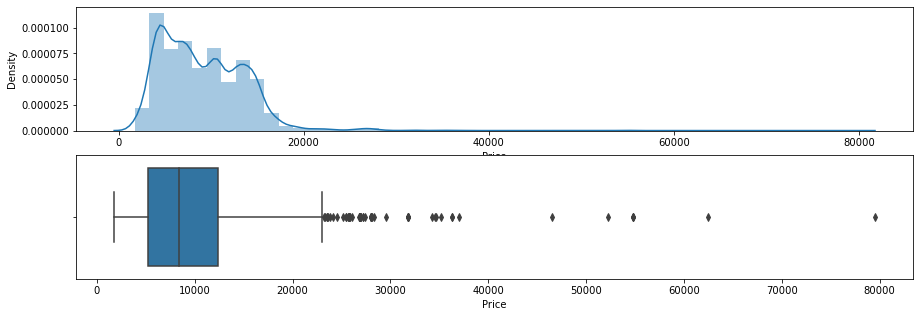

In [57]:
#Y = pd.DataFrame(y) 
plot(y,'Price')



**Interpretation:** From the above plot, we can notice that the variable 'Price' is heavily right skewed and not normally distributed

Let us perform the Jarque-Bera test to check the normality of the target variable.

The null and alternate hypothesis of Jarque-Bera test are as follows: <br>
    
    H0: The data is normally distributed
    H1: The data is not normally distributed

In [58]:
# import required libaries
from scipy.stats import jarque_bera

# normality test using jarque_bera()
# the test returns the the test statistics and the p-value of the test
stat, p = jarque_bera(y["Price"])

# to print the numeric outputs of the Jarque-Bera test upto 3 decimal places
# %.3f: returns the a floating point with 3 decimal digit accuracy
# the '%' holds the place where the number is to be printed
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

# display the conclusion
# set the level of significance to 0.05
alpha = 0.05

# if the p-value is greater than alpha print we accept alpha 
# if the p-value is less than alpha print we reject alpha
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=73721.566, p-value=0.000
The data is not normally distributed (reject H0)


**If the data is not normally distributed, use log transformation to get near normally distributed data**

As mentioned above we opt for log transformation. The log transformation can be used to make highly skewed distributions less skewed. We use np.log() to log transform the 'Price' variable. We also store the transformed variable into our data frame with a new name, 'log_Price'.

In [59]:
# log transformation for normality using np.log()
y_log = pd.DataFrame(np.log(y["Price"]))

# display first 5 rows of the data
y_log.head(2)

,Price
0,8.267962
1,8.944028


**Recheck for normality by plotting histogram and performing Jarque-Bera test**

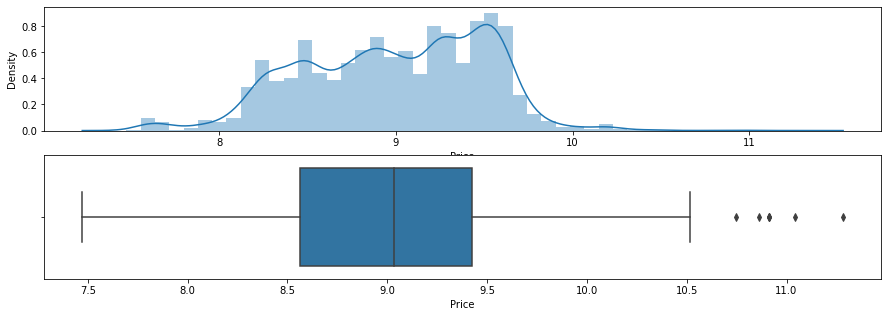

In [60]:
plot(y_log,'Price')


It can be seen that the variable Price is near normally distributed. However we again confirm by Jarque Bera test</br>

In [61]:
# recheck normality by Jarque-Bera test
# the test returns the the test statistics and the p-value of the test
statn, pv = jarque_bera(y_log['Price'])

# to print the numeric outputs of the Jarque-Bera test upto 3 decimal places
# %.3f: returns the a floating point with 3 decimal digit accuracy
# the '%' holds the place where the number is to be printed
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

# display the conclusion
# set the level of significance to 0.05
alpha = 0.05

# if the p-value is greater than alpha print we accept alpha 
# if the p-value is less than alpha print we reject alpha
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=73721.566, p-value=0.000
The data is not normally distributed (reject H0)


It can be visually seen that the data has near-normal distribution, but Jarque Bera test does not support the Price
<br>                    
Note that in reality it might be very tough for your data to adhere to all assumptions your algorithm needs

<a id='FeatureScaling'></a>
### 4.2 Feature Scaling

In [62]:
from sklearn.preprocessing import MinMaxScaler

scaler =MinMaxScaler()
X_scaled =pd.DataFrame(scaler.fit_transform(X),columns=[X.columns])
X_scaled.rename({'Distance(Km)':'Distance'},axis =1,inplace =True)
X_scaled.head()

,Distance,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Journey_day,Journey_month,Travel_Time,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_BOM,Source_CCU,Source_DEL,Source_MAA,Dest_CCU,Dest_COK,Dest_DEL,Dest_HYD,Stops
0,0.688556,0.956522,0.363636,0.043478,0.181818,0.884615,0.000000,0.058615,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
1,0.585581,0.217391,0.909091,0.565217,0.272727,0.000000,0.666667,0.156306,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667
2,1.000000,0.391304,0.454545,0.173913,0.454545,0.307692,1.000000,0.403197,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.666667
3,0.585581,0.782609,0.090909,1.000000,0.545455,0.423077,0.666667,0.113677,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333
4,0.688556,0.695652,0.909091,0.913043,0.636364,0.000000,0.000000,0.099467,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.333333


<a id='FeatureSelection'></a>
### 4.3 Feature Selection

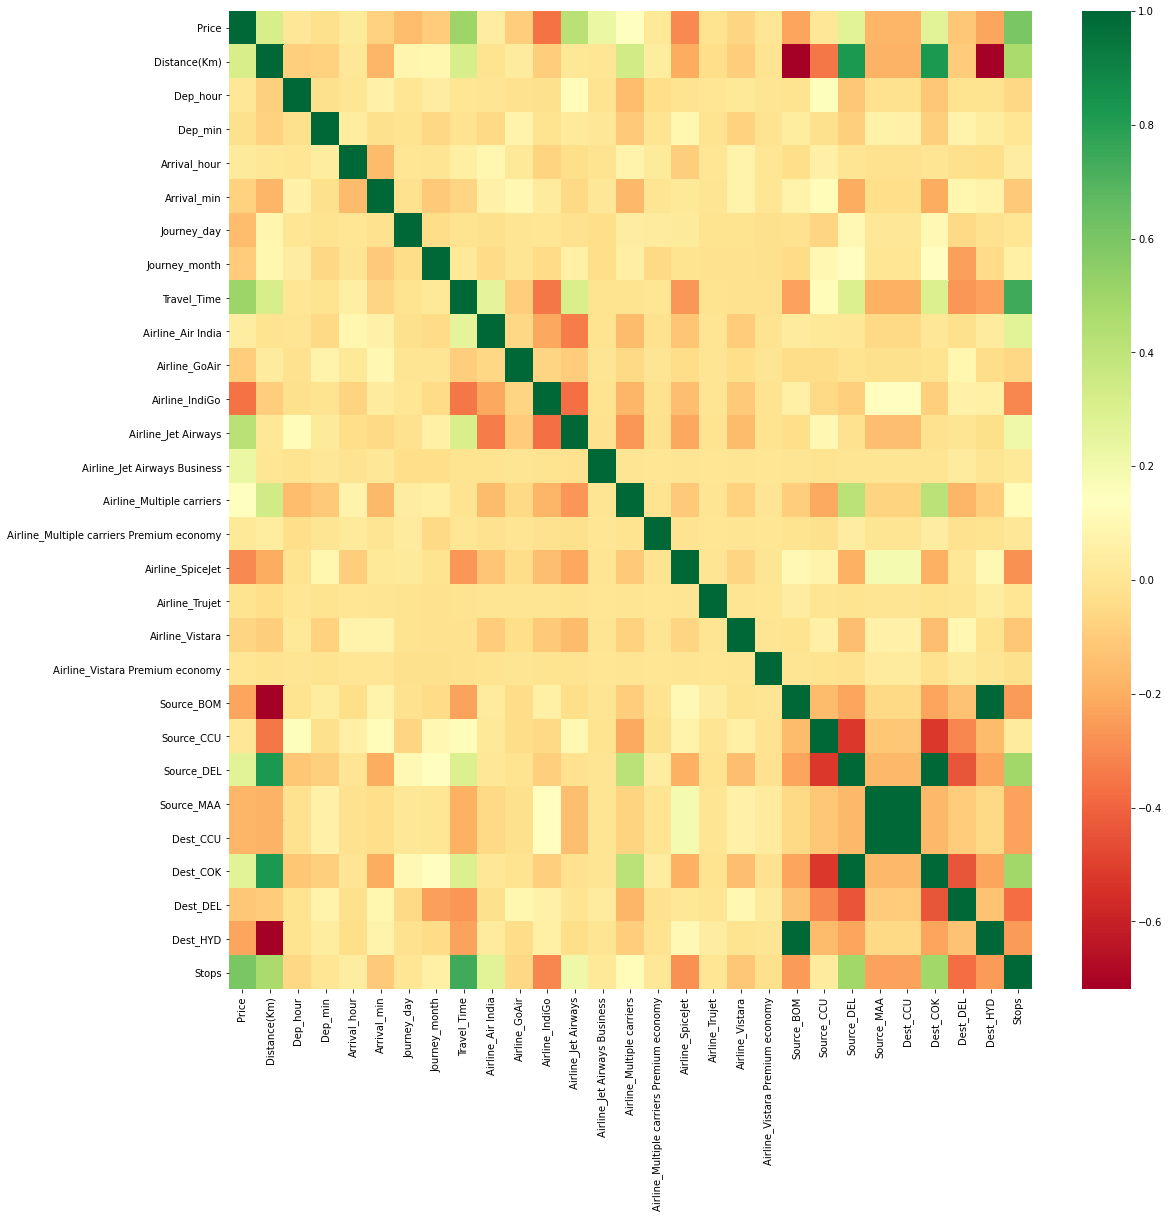

In [63]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(df_lr.corr(), annot = False, cmap = "RdYlGn")

plt.show()


<a id='Build'></a>
## 5 Model Building

### we are using Linear Regression (OLS) as it gives readily statistical reports for comparision

<a id='withoutLog'></a>
### 5.1 Multiple Linear Regression - Full Model - without Log Transformed Dependent Variable (OLS)

In this section we build a full model with linear regression using OLS (Ordinary Least Square) technique. By full model we indicate that we consider all the independent variables that are present in the dataset.

In this case, we do not consider any kind of transformation on the dependent variable, we use the 'Price' variable as it is.

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> We do not need to do the train and test split again since it has been done while building the previous model<br><br>
                       In order to build the model, we do the following: <br>
                       1. Build model using sm.OLS().fit()<br>
                       2. Predict the values using test set <br>
                       3. Compute the accuracy measures <br>
                       4. Tabulate the results
</b>
                </font>
            </div>
        </td>
    </tr>
</table>



**1. Build model using sm.OLS().fit()**

In [64]:
# split data into train subset and test subset for predictor and target variables
# random_state: the seed used by the random number generator
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [65]:
# ordinary least squares regression
# we use the train and test sets from the previous model
# however, now we shall build a model using the variable 'price' 

# build a full model using OLS()
linreg_full_model_withoutlog = sm.OLS(y_train['Price'], X_train).fit()

# print the summary output
print(linreg_full_model_withoutlog.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     462.9
Date:                Fri, 24 Dec 2021   Prob (F-statistic):               0.00
Time:                        21:06:55   Log-Likelihood:                -63399.
No. Observations:                6750   AIC:                         1.268e+05
Df Residuals:                    6726   BIC:                         1.270e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>This model explains 61.35 % of the variation in dependent variable Price.The Durbin-Watson test statistics is 1.97 and indicates that the is no autocorrelation. The Condition Number is 100193 suggests that there is severe collinearity.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>


**3. Predict the values using test set**

In [66]:
# predict the 'log_Price' using predict()
linreg_full_model_withoutlog_predictions = linreg_full_model_withoutlog.predict(X_test)

In [67]:
# take the exponential of predictions using np.exp()
predicted_price = np.exp(linreg_full_model_withoutlog_predictions)

# extract the 'Price' values from the test data
actual_price = y_test['Price']

**4. Compute accuracy measures**

Now we calculate accuray measures like Root-mean-square-error (RMSE), R-squared and Adjusted R-squared.

In [68]:
# calculate rmse using rmse()
linreg_full_model_withoutlog_rmse = rmse(actual_price, predicted_price)

# calculate R-squared using rsquared
linreg_full_model_withoutlog_rsquared = linreg_full_model_withoutlog.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_full_model_withoutlog_rsquared_adj = linreg_full_model_withoutlog.rsquared_adj


**5. Tabulate the results**

In [69]:
# create dataframe 'score_card'
# columns: specifies the columns to be selected
score_card = pd.DataFrame(columns=['Model_Name','Abbrevation', 'R-Squared', 'Adj. R-Squared', 'RMSE'])

# print the score card
score_card

,Model_Name,Abbrevation,R-Squared,Adj. R-Squared,RMSE


In [70]:
# compile the required information
linreg_full_model_withoutlog_metrics = pd.Series({
                     'Model_Name': "Linreg full model without log of target variable",
                      'Abbrevation':'without_ylog',
                     'RMSE':linreg_full_model_withoutlog_rmse,
                     'R-Squared': linreg_full_model_withoutlog_rsquared,
                     'Adj. R-Squared': linreg_full_model_withoutlog_rsquared_adj     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(linreg_full_model_withoutlog_metrics, ignore_index=True)

# print the result table
score_card

,Model_Name,Abbrevation,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model without log of target variable,without_ylog,0.612866,0.611542,inf


In [71]:
###############################################################################

<a id='withLog'></a>
### 5.2 Multiple Linear Regression - Full Model - with Log Transformed Dependent Variable (OLS)

In this section we build a full model with linear regression using OLS (Ordinary Least Square) technique. By full model we indicate that we consider all the independent variables that are present in the dataset.

**1. Split the data into training and test sets**

In [72]:
# split data into train subset and test subset for predictor and target variables
# random_state: the seed used by the random number generator
X_train, X_test, y_train, y_test = train_test_split(X, y_log, random_state=1)

# check the dimensions of the train & test subset for 

# print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)


The shape of X_train is: (6750, 28)
The shape of X_test is: (2250, 28)
The shape of y_train is: (6750, 1)
The shape of y_test is: (2250, 1)


**2. Build model using sm.OLS().fit()**

In [73]:
# build a full model using OLS()
# consider the log of Price 
linreg_full_model_withlog = sm.OLS(y_train["Price"], X_train).fit()

# print the summary output
print(linreg_full_model_withlog.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     729.6
Date:                Fri, 24 Dec 2021   Prob (F-statistic):               0.00
Time:                        21:06:55   Log-Likelihood:                -890.18
No. Observations:                6750   AIC:                             1828.
Df Residuals:                    6726   BIC:                             1992.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

This model explains 61.3% of the variation in dependent variable Price.The Durbin-Watson test statistics is 1.970 and indicates that there is no autocorrelation. The Condition Number 3.47e+18 suggests that there is severe collinearity.

Let us also take a look at building a linear regression full model without performing any kind of transformation on target variable

**2. Predict the values using test set**

In [74]:
# predict the Price using predict()
predicted_Price = linreg_full_model_withlog.predict(X_test)

# extract the 'Price' values from the test data
actual_Price = y_test['Price']

**3. Compute model accuracy measures**

Now we calculate accuray measures like Root-mean-square-error (RMSE), R-squared and Adjusted R-squared.

In [75]:
# calculate rmse using rmse()
linreg_full_model_withlog_rmse = rmse(actual_Price, predicted_Price)

# calculate R-squared using rsquared
linreg_full_model_withlog_rsquared = linreg_full_model_withlog.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_full_model_withlog_rsquared_adj = linreg_full_model_withlog.rsquared_adj 

**4. Tabulate the results**

In [76]:
# compile the required information
linreg_full_model_withlog_metrics = pd.Series({
                     'Model_Name': "Linreg full model with log of target variable",
                    'Abbrevation':'with_ylog',
                     'RMSE':linreg_full_model_withlog_rmse,
                     'R-Squared': linreg_full_model_withlog_rsquared,
                     'Adj. R-Squared': linreg_full_model_withlog_rsquared_adj     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(linreg_full_model_withlog_metrics, ignore_index=True)

# print the result table
score_card

,Model_Name,Abbrevation,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model without log of target variable,without_ylog,0.612866,0.611542,inf
1,Linreg full model with log of target variable,with_ylog,0.713873,0.712894,0.273860


<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> On comparing the above models, it is seen that the R-squared and the Adjusted R-squared value for the model without considering log transformation of the variable 'Price' is lower than the other model. And, the RMSE value of the model  considering the log transformation is considerably lower. So, we continue with variable 'Price' with y log transformation
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [77]:
###############################################################################

<a id='scaled'></a>
### 5.3 Multiple Linear Regression - Full Model - with Log Transformed Dependent Variable (OLS) and scaled Indepedent Variable

In this section we build a full model with linear regression using OLS (Ordinary Least Square) technique. By full model we indicate that we consider all the independent variables that are present in the dataset.

**1. Split the data into training and test sets**

In [78]:
# split data into train subset and test subset for predictor and target variables
# random_state: the seed used by the random number generator
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_log, random_state=1)

# check the dimensions of the train & test subset for 

# print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)


The shape of X_train is: (6750, 28)
The shape of X_test is: (2250, 28)
The shape of y_train is: (6750, 1)
The shape of y_test is: (2250, 1)


In [79]:
# build a full model using OLS()
# consider the log of Price 
linreg_full_model_withlog_scaled = sm.OLS(y_train["Price"], X_train).fit()

# print the summary output
print(linreg_full_model_withlog_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     729.6
Date:                Fri, 24 Dec 2021   Prob (F-statistic):               0.00
Time:                        21:06:55   Log-Likelihood:                -890.18
No. Observations:                6750   AIC:                             1828.
Df Residuals:                    6726   BIC:                             1992.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

**2. Predict the values using test set**

In [80]:
# predict the Price using predict()
predicted_Price = linreg_full_model_withlog_scaled.predict(X_test)

# extract the 'Price' values from the test data
actual_Price = y_test['Price']

**3. Compute model accuracy measures**

Now we calculate accuray measures like Root-mean-square-error (RMSE), R-squared and Adjusted R-squared.

In [81]:
# calculate rmse using rmse()
rmse = rmse(actual_Price, predicted_Price)

# calculate R-squared using rsquared
r2 = linreg_full_model_withlog_scaled.rsquared

# calculate Adjusted R-Squared using rsquared_adj
adj_r2 = linreg_full_model_withlog_scaled.rsquared_adj 

**4. Tabulate the results**

In [82]:
# compile the required information
linreg_full_model_withlog_metrics_scaled = pd.Series({
                     'Model_Name': "Linreg full model with log of target variable_scaled",
                    'Abbrevation':'Xscaled',
                     'RMSE':rmse,
                     'R-Squared': r2,
                     'Adj. R-Squared': adj_r2     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(linreg_full_model_withlog_metrics_scaled, ignore_index=True)

# print the result table
score_card

,Model_Name,Abbrevation,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model without log of target variable,without_ylog,0.612866,0.611542,inf
1,Linreg full model with log of target variable,with_ylog,0.713873,0.712894,0.273860
2,Linreg full model with log of target variable_...,Xscaled,0.713873,0.712894,0.273860


<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> On comparing the above models, it is seen that the R-squared and the Adjusted R-squared value for the model without considering log transformation of the variable 'Price' is lower than the other model. And, the RMSE value of the model  considering the log transformation is considerably lower. So, we continue with variable 'Price' with y log transformation
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [83]:
########################################################################

#### Backward Elimination

In [84]:
from mlxtend.feature_selection import SequentialFeatureSelector  as sfs

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,adjusted_rand_score

In [86]:
xtrain, xtest, ytrain,ytest = train_test_split(X,y_log, test_size =.2, random_state=100)

In [87]:
################################VIF ##################

In [88]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [89]:
def checkVIF(X):
    vif =pd.DataFrame()
    vif['Features'] =X.columns
    vif['VIF'] =[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif['VIF'] =round(vif['VIF'],2)
    vif =vif.sort_values(by='VIF',ascending =False)
    return vif

In [90]:
df =checkVIF(xtrain)
df

,Features,VIF
0,Distance(Km),inf
26,Dest_HYD,inf
25,Dest_DEL,inf
24,Dest_COK,inf
23,Dest_CCU,inf
22,Source_MAA,inf
21,Source_DEL,inf
20,Source_CCU,inf
19,Source_BOM,inf
11,Airline_Jet Airways,9.690000


In [91]:
vif_select = df[df['VIF'] <=5]
vif_select

,Features,VIF
15,Airline_SpiceJet,3.640000
27,Stops,3.080000
17,Airline_Vistara,2.640000
7,Travel_Time,2.560000
9,Airline_GoAir,1.620000
4,Arrival_min,1.130000
6,Journey_month,1.110000
2,Dep_min,1.100000
3,Arrival_hour,1.080000
1,Dep_hour,1.060000


In [92]:
len(vif_select)

15

In [93]:
features_back =list(vif_select['Features'])

In [94]:
# Model with features selected from backward Elimination
vlr = LinearRegression()
vlr.fit(xtrain[features_back],ytrain)

ypred_train = vlr.predict(xtrain[features_back])
ypred_test = vlr.predict(xtest[features_back])

r2_train = vlr.score(xtrain[features_back],ytrain)  # train score
r2_test = vlr.score(xtest[features_back],ytest)  # test score

mse_train = mean_squared_error(ytrain,ypred_train )
mse_test = mean_squared_error(ytest,ypred_test )

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

res_back = [r2_train,r2_test,rmse_train,rmse_test]
res_back

[0.568036686626668,
 0.561451162509014,
 0.33630706611652145,
 0.34405899138900115]

In [95]:
adj_r2 = (1 - (1 - r2_train) * ((xtrain.shape[0] - 1) / 
          (xtrain.shape[0] - xtrain.shape[1] - 1)))
adj_r2

0.5663500358423348

In [96]:
# compile the required information
VIF = pd.Series({
                     'Model_Name': "VIF - 15 Features",
                    'Abbrevation':'VIF',
                     'RMSE':rmse_train,
                     'R-Squared': r2_train,
                     'Adj. R-Squared': adj_r2    
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(VIF, ignore_index=True)

# print the result table
score_card

,Model_Name,Abbrevation,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model without log of target variable,without_ylog,0.612866,0.611542,inf
1,Linreg full model with log of target variable,with_ylog,0.713873,0.712894,0.273860
2,Linreg full model with log of target variable_...,Xscaled,0.713873,0.712894,0.273860
3,VIF - 15 Features,VIF,0.568037,0.566350,0.336307


In [97]:
########################

#### Base Linear Regression Model

In [98]:
lr = LinearRegression()
lr.fit(xtrain,ytrain)
y_pred = lr.predict(xtest)

### Backward elimination

In [99]:
# using Y log and scaled model as reference do backward selection 

lr_back_best= sfs(estimator=lr, k_features='best', scoring ='r2', forward=False)
sfs_back_best=lr_back_best.fit(X,y_log)
print(sfs_back_best.k_feature_names_)
print(sfs_back_best.k_score_)

('Dep_hour', 'Journey_day', 'Journey_month', 'Travel_Time', 'Airline_Air India', 'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business', 'Airline_Multiple carriers', 'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet', 'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_BOM', 'Source_CCU', 'Source_MAA', 'Dest_CCU', 'Dest_COK', 'Dest_HYD', 'Stops')
0.7101739180693206


In [100]:
features_back = list(sfs_back_best.k_feature_names_)

In [101]:
len(features_back)

21

In [102]:
# Model with features selected from backward Elimination
lr = LinearRegression()
lr.fit(xtrain[features_back],ytrain)

ypred_train = lr.predict(xtrain[features_back])
ypred_test = lr.predict(xtest[features_back])

r2_train = lr.score(xtrain[features_back],ytrain)  # train score
r2_test = lr.score(xtest[features_back],ytest)  # test score

mse_train = mean_squared_error(ytrain,ypred_train )
mse_test = mean_squared_error(ytest,ypred_test )

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

res_back = [r2_train,r2_test,rmse_train,rmse_test]
res_back

[0.7115175235930798, 0.7131410204928604, 0.274835152040696, 0.2782647244099979]

In [103]:
adj_r2 = (1 - (1 - r2_train) * ((xtrain.shape[0] - 1) / 
          (xtrain.shape[0] - xtrain.shape[1] - 1)))
adj_r2

0.7103911103537278

In [104]:
# compile the required information
Feature_Backward = pd.Series({
                     'Model_Name': "Backward elimination -22 features",
                    'Abbrevation':'Backward',
                     'RMSE':rmse_train,
                     'R-Squared': r2_train,
                     'Adj. R-Squared': adj_r2     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(Feature_Backward, ignore_index=True)

# print the result table
score_card

,Model_Name,Abbrevation,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model without log of target variable,without_ylog,0.612866,0.611542,inf
1,Linreg full model with log of target variable,with_ylog,0.713873,0.712894,0.273860
2,Linreg full model with log of target variable_...,Xscaled,0.713873,0.712894,0.273860
3,VIF - 15 Features,VIF,0.568037,0.566350,0.336307
4,Backward elimination -22 features,Backward,0.711518,0.710391,0.274835


#### Forward Selection

In [105]:
lr = LinearRegression()
lr.fit(xtrain,ytrain)
y_pred = lr.predict(xtest)

In [106]:
# using Y log and scaled model as reference do backward selection 

lr_front_best= sfs(estimator=lr, k_features='best', scoring ='r2', forward=True)
sfs_front_best=lr_front_best.fit(X,y_log)
print(sfs_front_best.k_feature_names_)
print(sfs_front_best.k_score_)

('Dep_hour', 'Journey_day', 'Journey_month', 'Travel_Time', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business', 'Airline_Multiple carriers', 'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet', 'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_BOM', 'Source_CCU', 'Source_MAA', 'Dest_COK', 'Dest_DEL', 'Stops')
0.7100632986949205


In [107]:
features_front = list(sfs_front_best.k_feature_names_)

In [108]:
len(features_front)

20

In [109]:
# Model with features selected from Forward Selection
lr = LinearRegression()
lr.fit(xtrain[features_front],ytrain)

ypred_train = lr.predict(xtrain[features_front])
ypred_test = lr.predict(xtest[features_front])

r2_train = lr.score(xtrain[features_front],ytrain)  # train score
r2_test = lr.score(xtest[features_front],ytest)  # test score

mse_train = mean_squared_error(ytrain,ypred_train )
mse_test = mean_squared_error(ytest,ypred_test )

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

res_front = [r2_train,r2_test,rmse_train,rmse_test]
res_front

[0.7114976775544897,
 0.7131424067977873,
 0.2748446054662495,
 0.27826405202347343]

In [110]:
adj_r2 = (1 - (1 - r2_train) * ((xtrain.shape[0] - 1) / 
          (xtrain.shape[0] - xtrain.shape[1] - 1)))
adj_r2

0.7103711868239815

In [111]:
# compile the required information
Feature_Forward = pd.Series({
                     'Model_Name': "Forward selection - 20 features",
                    'Abbrevation':'Forward',
                     'RMSE':rmse_train,
                     'R-Squared': r2_train,
                     'Adj. R-Squared': adj_r2     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(Feature_Forward, ignore_index=True)

# print the result table
score_card

,Model_Name,Abbrevation,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model without log of target variable,without_ylog,0.612866,0.611542,inf
1,Linreg full model with log of target variable,with_ylog,0.713873,0.712894,0.273860
2,Linreg full model with log of target variable_...,Xscaled,0.713873,0.712894,0.273860
3,VIF - 15 Features,VIF,0.568037,0.566350,0.336307
4,Backward elimination -22 features,Backward,0.711518,0.710391,0.274835
5,Forward selection - 20 features,Forward,0.711498,0.710371,0.274845


#### RFE

In [112]:
from sklearn.feature_selection import RFE

In [113]:
rfe = RFE(estimator = lr, n_features_to_select = 14)
rfe_model = rfe.fit(X,y_log)
rfe_model.ranking_

array([10,  9, 12, 14, 13,  6,  1, 15,  1, 11,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  3,  7,  8,  5,  4,  1,  1])

In [114]:
rank=pd.DataFrame()
rank['Feature']=X.columns
rank['Rank']=rfe_model.ranking_
rank
features_rank= rank[rank['Rank']==1]['Feature']
features_rank

6                                 Journey_month
8                             Airline_Air India
10                               Airline_IndiGo
11                          Airline_Jet Airways
12                 Airline_Jet Airways Business
13                    Airline_Multiple carriers
14    Airline_Multiple carriers Premium economy
15                             Airline_SpiceJet
16                               Airline_Trujet
17                              Airline_Vistara
18              Airline_Vistara Premium economy
19                                   Source_BOM
26                                     Dest_HYD
27                                        Stops
Name: Feature, dtype: object

In [115]:
len(features_rank)

14

In [116]:
features_rank

6                                 Journey_month
8                             Airline_Air India
10                               Airline_IndiGo
11                          Airline_Jet Airways
12                 Airline_Jet Airways Business
13                    Airline_Multiple carriers
14    Airline_Multiple carriers Premium economy
15                             Airline_SpiceJet
16                               Airline_Trujet
17                              Airline_Vistara
18              Airline_Vistara Premium economy
19                                   Source_BOM
26                                     Dest_HYD
27                                        Stops
Name: Feature, dtype: object

In [117]:
# Model with features selected from RFE
lr_rfe = LinearRegression()
lr_rfe.fit(xtrain[features_rank],ytrain)

ypred_train = lr_rfe.predict(xtrain[features_rank])
ypred_test = lr_rfe.predict(xtest[features_rank])

r2_train = lr_rfe.score(xtrain[features_rank],ytrain)  # train score
r2_test = lr_rfe.score(xtest[features_rank],ytest)  # test score

mse_train = mean_squared_error(ytrain,ypred_train )
mse_test = mean_squared_error(ytest,ypred_test )

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

res_rfe = [r2_train,r2_test,rmse_train,rmse_test]
res_rfe

[0.6950440053880789,
 0.6922037510390686,
 0.2825733158496265,
 0.28824089077556575]

In [118]:
adj_r2 = (1 - (1 - r2_train) * ((xtrain.shape[0] - 1) / 
          (xtrain.shape[0] - xtrain.shape[1] - 1)))
adj_r2

0.6938532693890365

In [119]:
# compile the required information
RFE = pd.Series({
                     'Model_Name': "RFE - 14 features",
                     'Abbrevation':'RFE',
                     'RMSE':rmse_train,
                     'R-Squared': r2_train,
                     'Adj. R-Squared': adj_r2     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(RFE, ignore_index=True)

# print the result table
score_card

,Model_Name,Abbrevation,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model without log of target variable,without_ylog,0.612866,0.611542,inf
1,Linreg full model with log of target variable,with_ylog,0.713873,0.712894,0.273860
2,Linreg full model with log of target variable_...,Xscaled,0.713873,0.712894,0.273860
3,VIF - 15 Features,VIF,0.568037,0.566350,0.336307
4,Backward elimination -22 features,Backward,0.711518,0.710391,0.274835
5,Forward selection - 20 features,Forward,0.711498,0.710371,0.274845
6,RFE - 14 features,RFE,0.695044,0.693853,0.282573


In [120]:
#########################


**1. Build model using sm.OLS().fit()**

In [121]:
X_significant =X[features_front]

# add the intercept column to the dataset
X_significant = sm.add_constant(X_significant)

# split data into train subset and test subset for predictor and target variables
# random_state: the seed used by the random number generator
X_train_significant, X_test_significant, y_train, y_test = train_test_split(X_significant, y_log, random_state=1)


# build a full model with significant variables using OLS()
linreg_model_with_significant_var = sm.OLS(y_train['Price'],X_train_significant).fit()

# to print the summary output
print(linreg_model_with_significant_var.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     883.4
Date:                Fri, 24 Dec 2021   Prob (F-statistic):               0.00
Time:                        21:08:22   Log-Likelihood:                -891.22
No. Observations:                6750   AIC:                             1822.
Df Residuals:                    6730   BIC:                             1959.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

<a id='Assumptions'></a>
### 5.3.2 Check the Assumptions of the Linear Regression

Now we perform test for checking presence of Autocorrelation and Heteroskedasticity.

<a id='Autocorrelation'></a>
### 5.3.2.1 Detecting Autocorrelation

Autocorrelation (also called serial correlation) refers to the degree of correlation between the values of the same variables across different observations in the data. One of the assumptions of the linear regression is that there should not be autocorrelation.

The Durbin Watson Test is a measure of autocorrelation in residuals from the regression analysis.
Autocorrelation being present typically indicates that we are missing some information that should be captured by the model.

The null and alternate hypothesis of Durbin-Watson test is as follows: <br>
        
          H0: There is no autocorrelation in the residuals
          H1: There is autocorrelation in the residuals

**The test statistic is approximately equal to 2*(1-r) where r is the sample autocorrelation of the residuals. Thus, for r == 0, indicating no serial correlation, the test statistic equals 2. This statistic will always be between 0 and 4. The closer to 0 the statistic, the more evidence for positive serial correlation. The closer to 4, the more evidence for negative serial correlation**

**From the summary output in section 5.3.1, we see that the Durbin-Watson static is  1.980**

**Hence we can conclude that there is no autocorrelation**

<table align="left">
    <tr>
        <td width="8%">
            <img src="alsoreadicon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>We can also find out the p-value associated with the Durbin-Watson statistic from Durbin_Watson table in order to reject or fail to reject the null hypothesis. Reference URL: <a href="https://bit.ly/36DJDR8">Durbin-Watson Table</b>
                </font>
            </div>
        </td>
    </tr>
</table>



<a id='Heteroskedasticity'></a>
### 5.3.2.2 Detecting Heteroskedasticity
Heteroskedasticity is a systematic change in the spread of the residuals over the range of measured values. One of the assumptions of the linear regression is that there should not be Heteroskedasticity.

Breusch-Pagan is the test for detecting heteroskedasticity:

The null and alternate hypothesis of Breusch-Pagan test is as follows:<BR>
    
    H0: The residuals are homoskedastic
    H1: The residuals are not homoskedastic

In [122]:
# create vector of result parmeters
name = ['f-value','p-value']           

# perform Breusch-Pagan test using het_breushpagan()
# compute residuals using 'resid'
# 'exog' returns the independent variables in the model alng with the intercept
test = sms.het_breuschpagan(linreg_model_with_significant_var.resid, linreg_model_with_significant_var.model.exog)

# print the output
# use 'lzip' to zip the column names and test results
lzip(name, test)        

[('f-value', 940.686804684619), ('p-value', 1.7092307476106593e-186)]

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>We observe that p-value is less than 0.05 and thus reject the null hypothesis. We conclude that there is heteroskedasticity present in the data. In real life it might not be possible to meet all the assumptions of linear regression.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>


<a id='Linearity_of_Residuals'></a>
### 5.3.2.3 Linearity of Residuals

Multiple linear regression requires the relationship between the independent and dependent variables to be linear, i.e. it should be linear in the parameters. The linearity assumption can best be tested with scatterplots.<br><br>The independent variables must have a linear relationship with the dependent variable.

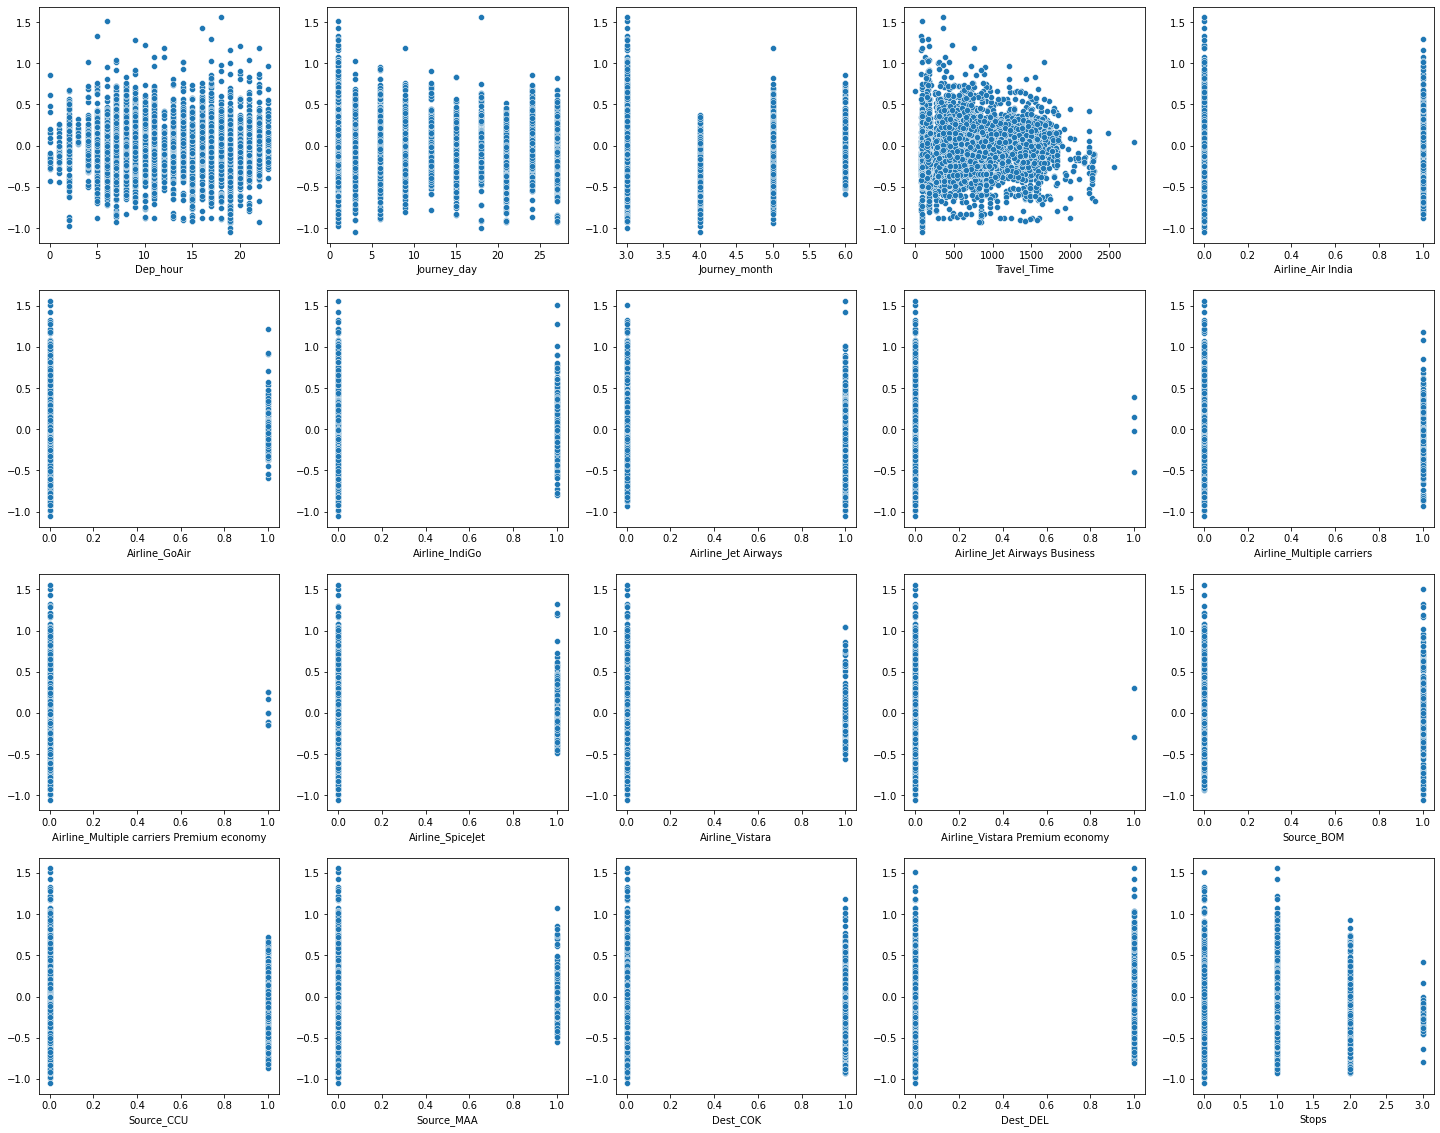

In [123]:
# create subplots of scatter plots
# pass the number of rows in a subplot to 'nrows'
# pass the number of columns in a subplot to 'ncolumns'
# set plot size using 'figsize'
fig, ax = plt.subplots(nrows = 4, ncols= 5, figsize=(25, 20))

# use for loop to create scatter plot for residuals and each independent variable (do not consider the intercept)
# 'ax' assigns axes object to draw the plot onto 
for variable, subplot in zip(X_train_significant.columns[1:], ax.flatten()):
    sns.scatterplot(X_train_significant[variable], linreg_model_with_significant_var.resid , ax=subplot)

# display the plot
plt.show()

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>From the plots we see that none of the plots show a specific pattern. Hence, we may conclude that the variables are linearly related to the dependent variable.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Normality_of_Residuals'></a>
### 5.3.2.4 Normality of Residuals

The assumption of normality is an important assumption for many statistical tests. The normal Q-Q plot is one way to assess normality. This q-q or quantile-quantile is a scatter plot which helps us validate the assumption of normal distribution in a data set.

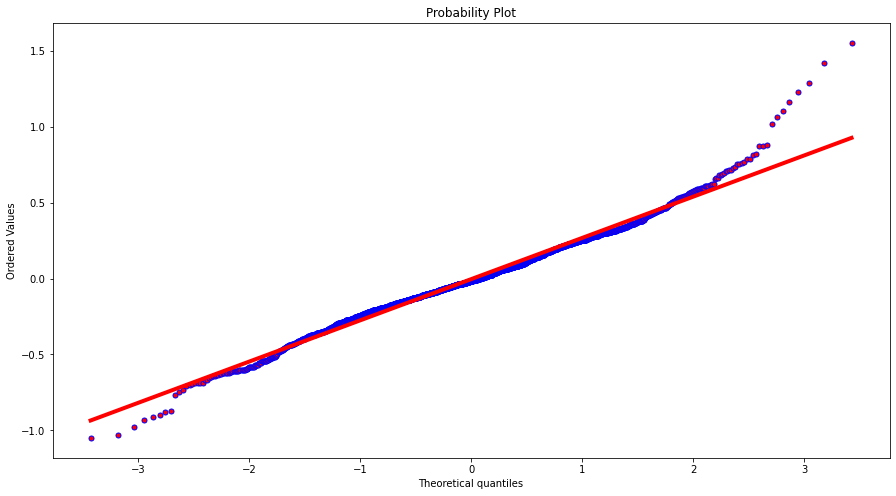

In [124]:
# calculate fitted values
fitted_vals = linreg_model_with_significant_var.predict(X_test_significant)

# calculate residuals
resids = actual_Price - fitted_vals

# create subplots using subplots() such that there is one row having one plot
# 'figsize' sets the figure size
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

# plot the probability plot to check the normality of the residuals
# plot: if specified plots the least squares fit
stats.probplot(resids, plot=plt)

# set the marker type using the set_marker() parameter
# access the line object from the axes object using ax.get_lines()
# then, the properties can be changed accordingly
# set the marker to 'o' to use circles as points
ax.get_lines()[0].set_marker('o')

# set the marker size using the set_markersize() parameter
# set the marker size to 5
ax.get_lines()[0].set_markersize(5.0)

# set the color of the trend line using set_markerfacecolor()
# set color of the trend line to red by passing 'r' to the set_markerfacecolor
ax.get_lines()[0].set_markerfacecolor('r')

# set the trend line width
ax.get_lines()[1].set_linewidth(4.0)

# display the plot
plt.show()

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> Using this plot, we can infer that the residuals do not come from a normal distribution. This is possible since our target variable is not normally distributed.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**The mean of the residuals always equals zero (assuming that your line is actually the line of “best fit”)** 

In [125]:
# check the mean of the residual
linreg_model_with_significant_var.resid.mean()

3.706269858917545e-14

The mean of the residuals is very much closer to zero. Therefore, we can say that linearity is present.

**Perform Jarque Bera test to check normality of the residuals**

In [126]:
# normality test using 'jarque_bera'
# the test returns the the test statistics and the p-value of the test
stat, p = jarque_bera(resids)

# to print the numeric outputs of the Jarque-Bera test upto 3 decimal places
# %.3f: returns the a floating point with 3 decimal digit accuracy
# the '%' holds the place where the number is to be printed
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

# display the conclusion
# set the level of significance to 0.05
alpha = 0.05

# if the p-value is greater than alpha print we accept alpha 
# if the p-value is less than alpha print we reject alpha
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=330.465, p-value=0.000
The data is not normally distributed (reject H0)


<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>It is apparent that the p-value is less than 0.05. So we have enough evidence to reject the null hypothesis. It can be concluded that the residuals is not normally distributed.<br><br>
                    </b> </font>
            </div>
        </td>
    </tr>
</table>


In [127]:
######################

<a id='regularization'></a>
## 6. Regularization (OLS)

Overfitting occurs when an algorithm fits the data too well.  Specifically, overfitting occurs if the algorithm shows low bias but high variance.  It is often a result of an excessively complicated model. This can be prevented by fitting multiple models and using cross-validation to compare their predictive accuracies on test data.

Underfitting occurs when an algorithm cannot capture the underlying trend of the data. Intuitively, it occurs when the algorithm does not fit the data well enough. Specifically, it occurs if the model or algorithm shows low variance but high bias. It is often a result of an excessively simple model

One of the challenge in machine learning is that our algorithm must perform well on new, previously unseen data - not just those on which our model was trained. This ability to perform well on previously unobserved data is called generalization. Generalization error is defined as the expected value of the error on a new data. Regularization is any modification we make to a learning algorithm that is intended to reduce it generalization error but not its training error. (Ref. Deep Learning by Ian Goodfellow, Yoshua Bengio, Aaron Courville)

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Now we will perform regularization to check whether this technique performs better than our linear regression models without regularization</b>
</b>
                </font>
            </div>
        </td>
    </tr>
</table>



<a id='Ridge_Regression'></a>
### 6.1 Ridge Regression 

In [128]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [129]:
rid = Ridge(alpha = 0.8, normalize=True)
rid.fit(xtrain,ytrain)

ypred_train =rid.predict(xtrain)
ypred_test =rid.predict(xtest)

train_r2 = r2_score(ytrain, ypred_train) #train dataset 
test_r2 = r2_score(ytest, ypred_test)    # test dataset 

train_mse = mean_squared_error(ytrain, ypred_train)
test_mse = mean_squared_error(ytest, ypred_test)

train_rmse = np.sqrt(train_mse)
test_rmse  = np.sqrt(test_mse)

res_rid = [train_r2,test_r2,train_rmse,test_rmse]
res_rid


[0.6430022070689526,
 0.6456300512636985,
 0.3057351177083873,
 0.30928038171291705]

In [130]:
las = Lasso(alpha = 0.8, normalize=True)
las.fit(xtrain,ytrain)

ypred_train = las.predict(xtrain)
ypred_test =las.predict(xtest)

train_r2 = r2_score(ytrain, ypred_train) #train dataset 
test_r2 = r2_score(ytest, ypred_test)    # test dataset 

train_mse = mean_squared_error(ytrain, ypred_train)
test_mse = mean_squared_error(ytest, ypred_test)

train_rmse = np.sqrt(train_mse)
test_rmse  = np.sqrt(test_mse)

res_las = [train_r2,test_r2,train_rmse,test_rmse]
res_las


[0.0, -0.0003926924033190726, 0.5116966343598619, 0.5196479102772339]

In [131]:
from sklearn.model_selection import GridSearchCV

param = {'alpha':[0.1,0.01,0.8,0.2,0.02,0.03]}

r = Ridge(normalize=True)

rcv= GridSearchCV(r, param, cv= 3, scoring='r2')
rcv.fit(xtrain,ytrain)

rcv.best_params_

{'alpha': 0.01}

In [132]:
r1 = Ridge(alpha=0.01, normalize=True)
r1.fit(xtrain,ytrain)

ypred_train =r1.predict(xtrain)
ypred_test =r1.predict(xtest)

train_r2 = r2_score(ytrain, ypred_train) #train dataset 
test_r2 = r2_score(ytest, ypred_test)    # test dataset 

train_mse = mean_squared_error(ytrain, ypred_train)
test_mse = mean_squared_error(ytest, ypred_test)

train_rmse = np.sqrt(train_mse)
test_rmse  = np.sqrt(test_mse)

res_rid = [train_r2,test_r2,train_rmse,test_rmse]
res_rid

[0.7111479959982061,
 0.7124810692016481,
 0.2750111188309451,
 0.27858463014213164]

In [133]:
adj_r2 = (1 - (1 - train_r2) * ((xtrain.shape[0] - 1) / 
          (xtrain.shape[0] - xtrain.shape[1] - 1)))
adj_r2

0.7100201398955635

In [134]:
# compile the required information
ridge_regression_best_metrics = pd.Series({
                     'Model_Name': "Ridge Regression",
                      'Abbrevation':'Ridge',
                     'RMSE': train_rmse,
                     'R-Squared': train_r2,
                     'Adj. R-Squared': adj_r2     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(ridge_regression_best_metrics, ignore_index = True)

# print the result table
score_card

,Model_Name,Abbrevation,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model without log of target variable,without_ylog,0.612866,0.611542,inf
1,Linreg full model with log of target variable,with_ylog,0.713873,0.712894,0.273860
2,Linreg full model with log of target variable_...,Xscaled,0.713873,0.712894,0.273860
3,VIF - 15 Features,VIF,0.568037,0.566350,0.336307
4,Backward elimination -22 features,Backward,0.711518,0.710391,0.274835
5,Forward selection - 20 features,Forward,0.711498,0.710371,0.274845
6,RFE - 14 features,RFE,0.695044,0.693853,0.282573
7,Ridge Regression,Ridge,0.711148,0.710020,0.275011


In [135]:
from sklearn.model_selection import GridSearchCV

param = {'alpha':[0.1,0.01,0.8,0.2,0.02,0.03]}

l = Lasso(normalize=True)

lcv= GridSearchCV(l, param, cv= 5, scoring='r2')
lcv.fit(xtrain,ytrain)

lcv.best_params_

{'alpha': 0.1}

In [136]:
las = Lasso(alpha = 0.1, normalize=True)
las.fit(xtrain,ytrain)

ypred_train = las.predict(xtrain)
ypred_test =las.predict(xtest)

train_r2 = r2_score(ytrain, ypred_train) #train dataset 
test_r2 = r2_score(ytest, ypred_test)    # test dataset 

train_mse = mean_squared_error(ytrain, ypred_train)
test_mse = mean_squared_error(ytest, ypred_test)

train_rmse = np.sqrt(train_mse)
test_rmse  = np.sqrt(test_mse)

res_las = [train_r2,test_r2,train_rmse,test_rmse]
res_las


[0.0, -0.0003926924033190726, 0.5116966343598619, 0.5196479102772339]

In [137]:
# compile the required information
Lasso_regression_best_metrics = pd.Series({
                     'Model_Name': "Lasso Regression",
                     'Abbrevation':'Lasso',
                     'RMSE': train_rmse,
                     'R-Squared': train_r2,
                     'Adj. R-Squared': adj_r2     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(Lasso_regression_best_metrics, ignore_index = True)

# print the result table
score_card

,Model_Name,Abbrevation,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model without log of target variable,without_ylog,0.612866,0.611542,inf
1,Linreg full model with log of target variable,with_ylog,0.713873,0.712894,0.273860
2,Linreg full model with log of target variable_...,Xscaled,0.713873,0.712894,0.273860
3,VIF - 15 Features,VIF,0.568037,0.566350,0.336307
4,Backward elimination -22 features,Backward,0.711518,0.710391,0.274835
5,Forward selection - 20 features,Forward,0.711498,0.710371,0.274845
6,RFE - 14 features,RFE,0.695044,0.693853,0.282573
7,Ridge Regression,Ridge,0.711148,0.710020,0.275011
8,Lasso Regression,Lasso,0.000000,0.710020,0.511697


In [138]:
from sklearn.model_selection import GridSearchCV

param = {'alpha':[0.1,0.2,0.3,0.01],
        'l1_ratio':[0.3,0.4,0.5]}

e = ElasticNet(normalize=True)

ecv= GridSearchCV(e, param, cv= 5, scoring='r2')
ecv.fit(xtrain,ytrain)

ecv.best_params_

{'alpha': 0.01, 'l1_ratio': 0.3}

In [139]:
e1 = ElasticNet(alpha=0.01, l1_ratio= 0.3,normalize=True)
e1.fit(xtrain,ytrain)

ypred_train =e1.predict(xtrain)
ypred_test =e1.predict(xtest)

train_r2 = r2_score(ytrain, ypred_train) #train dataset 
test_r2 = r2_score(ytest, ypred_test)    # test dataset 

train_mse = mean_squared_error(ytrain, ypred_train)
test_mse = mean_squared_error(ytest, ypred_test)

train_rmse = np.sqrt(train_mse)
test_rmse  = np.sqrt(test_mse)

res_e1 = [train_r2,test_r2,train_rmse,test_rmse]
res_e1

[0.0073397027115145175,
 0.006825936326041004,
 0.5098153253526839,
 0.5177696794776]

In [140]:
# compile the required information
ElasticNet_regression_best_metrics = pd.Series({
                     'Model_Name': "ElasticNet Regression",
                     'Abbrevation':'ElasticNet',
                     'RMSE': train_rmse,
                     'R-Squared': train_r2,
                     'Adj. R-Squared': adj_r2     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(ElasticNet_regression_best_metrics, ignore_index = True)

# print the result table
score_card

,Model_Name,Abbrevation,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model without log of target variable,without_ylog,0.612866,0.611542,inf
1,Linreg full model with log of target variable,with_ylog,0.713873,0.712894,0.273860
2,Linreg full model with log of target variable_...,Xscaled,0.713873,0.712894,0.273860
3,VIF - 15 Features,VIF,0.568037,0.566350,0.336307
4,Backward elimination -22 features,Backward,0.711518,0.710391,0.274835
5,Forward selection - 20 features,Forward,0.711498,0.710371,0.274845
6,RFE - 14 features,RFE,0.695044,0.693853,0.282573
7,Ridge Regression,Ridge,0.711148,0.710020,0.275011
8,Lasso Regression,Lasso,0.000000,0.710020,0.511697
9,ElasticNet Regression,ElasticNet,0.007340,0.710020,0.509815


In [141]:
# add abbrevation for printing
score_card.drop(columns=['Abbrevation'],axis =1)
#score_card['Abbrevation'] ={'Without_yLog','With_yLog','Xscaled','Backward','Forward','RFE','Ridge','Lasso','ElasticNet'}
#score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model without log of target variable,0.612866,0.611542,inf
1,Linreg full model with log of target variable,0.713873,0.712894,0.273860
2,Linreg full model with log of target variable_...,0.713873,0.712894,0.273860
3,VIF - 15 Features,0.568037,0.566350,0.336307
4,Backward elimination -22 features,0.711518,0.710391,0.274835
5,Forward selection - 20 features,0.711498,0.710371,0.274845
6,RFE - 14 features,0.695044,0.693853,0.282573
7,Ridge Regression,0.711148,0.710020,0.275011
8,Lasso Regression,0.000000,0.710020,0.511697
9,ElasticNet Regression,0.007340,0.710020,0.509815


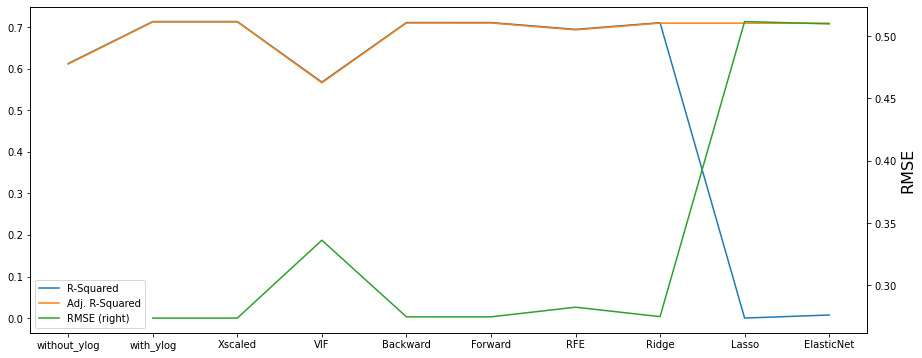

In [142]:
# plot the accuracy measure for all models
# secondary_y: specify the data on the secondary axis
plt.rcParams["figure.figsize"]=[15,6]

score_card.plot(secondary_y=['RMSE'])
labels =list(score_card['Abbrevation'])
plt.xlabel('xlabel', fontsize=18)
plt.xticks(score_card.index,labels)  
# Pad margins so that markers don't get 
# clipped by the axes
#plt.margins(0.2)


plt.ylabel('RMSE', fontsize=16)  
# Tweak spacing to prevent clipping of tick-labels
#plt.subplots_adjust(bottom = 0.15)
plt.show()

<a id='Deploy'></a> 
## 8 Save Predictive Model

In [143]:
# save Ridge model into disk for future use
import pickle
#open a file where you want to store the data
file = open('optimizedmodel.pkl','wb')

#dump information
pickle.dump(lr_rfe,file)

In [144]:
# retrive model from disk and use in test validation

loaded_model = pickle.load(open('optimizedmodel.pkl', 'rb'))
loaded_model.score(xtest[features_rank],ytest)


EOFError: Ran out of input